In [138]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

In [238]:
def set_plot_style():
    plt.rcParams['axes.edgecolor'] = 'silver'
    plt.rcParams['axes.titleweight'] = 'bold'
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['xtick.labelsize'] = 18 
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['grid.alpha'] = .3 
    ax = plt.gca()
    ax.set_facecolor((247/255,249/255,247/255))
    ax.title.set_position([.5,1.02])
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.grid(False)

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from inferential_stats import *
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [140]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [141]:
pd.isnull(df).any().sort_values(ascending=False)

FireplaceQu       True
GarageCond        True
BsmtFinType1      True
BsmtExposure      True
BsmtCond          True
BsmtQual          True
Electrical        True
MasVnrArea        True
MasVnrType        True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageQual        True
BsmtFinType2      True
LotFrontage       True
Alley             True
MiscFeature       True
Fence             True
PoolQC            True
LotConfig        False
RoofStyle        False
MSSubClass       False
MSZoning         False
LotArea          False
Foundation       False
ExterCond        False
ExterQual        False
Exterior2nd      False
Exterior1st      False
RoofMatl         False
                 ...  
GarageArea       False
PavedDrive       False
WoodDeckSF       False
OpenPorchSF      False
3SsnPorch        False
BsmtUnfSF        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SaleType         False
Functional 

In [142]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [143]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [144]:
len(df.columns)

81

In [145]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [146]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [147]:
len(df)

1460

## Analysis of Sale Price Distribution

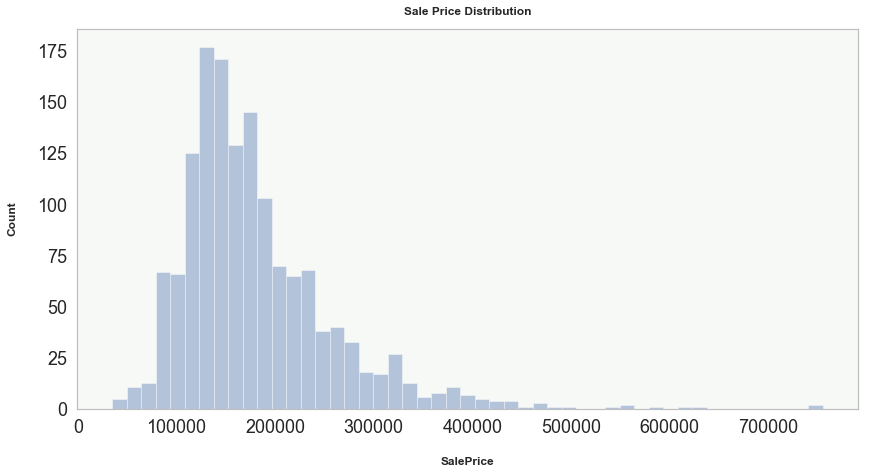

In [152]:

fig, ax = plt.subplots(figsize=(14,7))
sns.distplot(df['SalePrice'], ax=ax, kde=False)
plt.title('Sale Price Distribution')
_ = plt.ylabel('Count')
set_plot_style()

The distribution is clearly skewed to the right, with what look like several outliers. Is this data valid? Could there be a mistake or were these homes truly valued so much higher than the rest of the homes in this dataset.

Lets take a look at what seem to be the most obvious influencers on sales price, square footage and lot size. The goal here is to see if we see a similar distribution to that of sales price. If so, this would indicate perhaps that this skewed sales price distribution might in fact be representative.

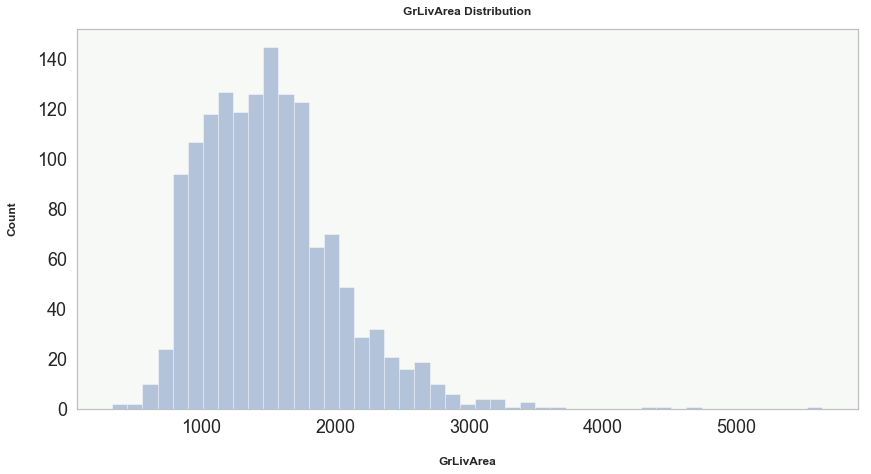

In [153]:
fig, ax = plt.subplots(figsize=(14,7))
sns.distplot(df['GrLivArea'], ax = ax, kde = False)
_ = plt.ylabel('Count')
plt.title('GrLivArea Distribution')
set_plot_style()

This is interesting, it looks like the living area (or square footage) also has some outliers and is skewed to the right just like sales price. So these 'outliers' might actually be validated by significantly larger square footage.

The documentation highlights the following:

There are 4 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Two of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). 

## Outliers

Lets take a look at these outliers with respect to sale price:

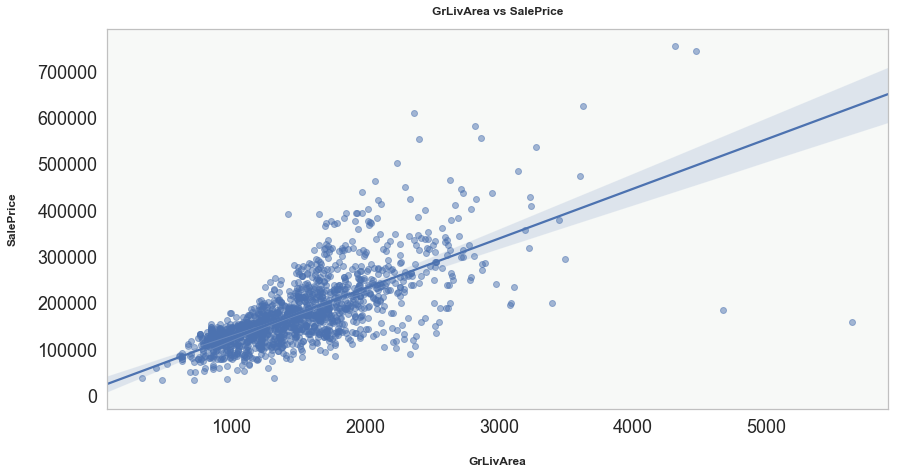

In [156]:
fig, ax = plt.subplots(figsize=(14,7))
sns.regplot(df.GrLivArea, df.SalePrice, ax=ax, scatter_kws={'alpha':0.5})
_ = plt.title('GrLivArea vs SalePrice')
set_plot_style()

It becomes obvious by looking at this plot where the outliers in the dataset can be found. Lets isolate these datapoints:

In [157]:
print(df[df['GrLivArea'] > 4000][['SalePrice', 'GrLivArea']])

      SalePrice  GrLivArea
523      184750       4676
691      755000       4316
1182     745000       4476
1298     160000       5642


For now we will leave these outliers in the dataset. For modeling purposes we dont want to assume a perfectly linear relationship so we will reevauluate whether or not to keep these in our dataset based on modeling results. Simply based on this graph it appears the two datapoints below 200,000 sale price could be outliers given there square footage.

## Missing Values

Now that we've eliminated the outliers, let's take a look at any missing values which we might benefit from repopulating:

In [158]:
#Calculate a the missing data (per attribute) as a percentage of the total (result is a pandas series)
missing_data = (df.isnull().sum() / len(df)) * 100
missing_data = missing_data.drop(missing_data[missing_data == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame(missing_data)

#Rename the percent missing field
missing_data = missing_data.rename(columns={missing_data.columns[0]:'Percent missing'})

#Prints out the top 20 fields with missing data
print(missing_data.head(20))

              Percent missing
PoolQC              99.520548
MiscFeature         96.301370
Alley               93.767123
Fence               80.753425
FireplaceQu         47.260274
LotFrontage         17.739726
GarageYrBlt          5.547945
GarageType           5.547945
GarageFinish         5.547945
GarageQual           5.547945
GarageCond           5.547945
BsmtFinType2         2.602740
BsmtExposure         2.602740
BsmtFinType1         2.534247
BsmtCond             2.534247
BsmtQual             2.534247
MasVnrArea           0.547945
MasVnrType           0.547945
Electrical           0.068493


### Missing Data Visualization

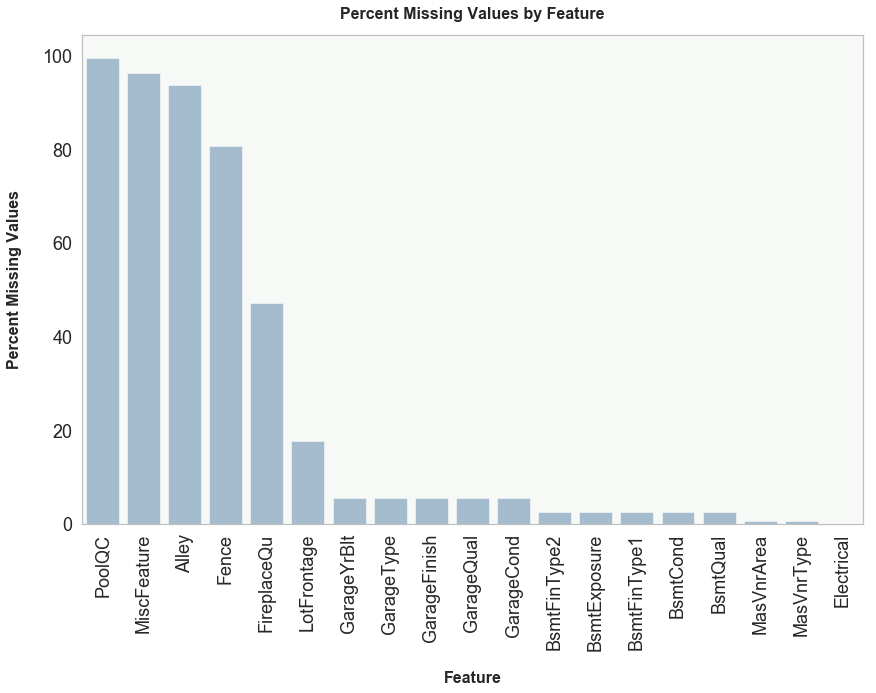

In [166]:
fig, ax = plt.subplots(figsize=(14,9))
plt.xticks(rotation='90')

sns.barplot(missing_data.index, missing_data['Percent missing'], ax=ax, color='steelblue', alpha=.5)
plt.ylabel('Percent Missing Values', fontsize=16)
plt.xlabel('Feature', fontsize=16)
_ = plt.title('Percent Missing Values by Feature', fontsize=16)
set_plot_style()

### Imputing Missing Values

The fields PoolQC, MiscFeature, Alley, Fence and FireplaceQu all have Na values which correspond to absence of that feature. For example Na for PoolQC means the property has no pool. To simplify the data processing here we would like to convert these values to a representative string "None". See below:

In [17]:
df["PoolQC"] = df["PoolQC"].fillna("None")

In [18]:
df['MiscFeature'] = df['MiscFeature'].fillna("None")

In [19]:
df["Alley"] = df["Alley"].fillna("None")

In [20]:
df["Fence"] = df["Fence"].fillna("None")

In [21]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

From the data dictionary, LotFrontage represents the amount of square footage on the street connected to the house. Its highly unlikely that this is 0, so in this case it's most likely just unrecorded data. To treat these values, we will fill in the missing LotFrontage values with the medianLotFrontage.

In [22]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

For GarageType, GarageQual and GarageCond we will replace missing data with 'No Garage' as indicated by the data dictionary:

In [23]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('No Garage')

For GarageYrBlt, GarageArea and GarageCars we will replace missing data with 0:

In [24]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

For BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 we can replace the null values with the string "No Basement":

In [25]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('No Basement')

For BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath we will replace missing values with 0 since null values indicate no basement here:

In [26]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

For MasVnrArea and MasVnrType here null values indicate no veneer applied to the home. So lets fill in 0/None for those as applicable:

In [27]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

For MSZoning, since this is categorical data, lets fill in the missing values with the most common value or the mode of the entries:

In [28]:
mode = df['MSZoning'].mode()[0]
df['MSZoning'] = df['MSZoning'].fillna(mode)

For Functional, or 'Home Functionality' we are told to assume 'typical':

In [29]:
df["Functional"] = df["Functional"].fillna("Typical")

For Electrical we can replace with mode since it is categorical data (and only 1 missing value is present):

In [30]:
mode = df['Electrical'].mode()[0]
df['Electrical'] = df['Electrical'].fillna(mode)

For Exterior1st and Exterior2nd (categorical data) we can replace missing values with the mode as well:

In [31]:
mode1 = df['Exterior1st'].mode()[0]
df['Exterior1st'] = df['Exterior1st'].fillna(mode1)

mode2 = df['Exterior2nd'].mode()[0]
df['Exterior2nd'] = df['Exterior2nd'].fillna(mode2)

Finally for MSSubClass we can replace null values with "No Building Class" as suggested by the data dictionary:

In [32]:
df['MSSubClass'] = df['MSSubClass'].fillna("No Building Class")

Now lets check to make sure we have eliminated all of the missing values:

In [33]:
missing_data = (df.isnull().sum() / len(df)) * 100
missing_data = missing_data.drop(missing_data[missing_data == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :missing_data})
missing_data.head()

Empty DataFrame
Columns: [Missing Ratio]
Index: []

## Pearson Correlation Coefficients

Now lets take a look at the corellations between numerical types. Float64 and int64 datatypes can be used in this evaluation.

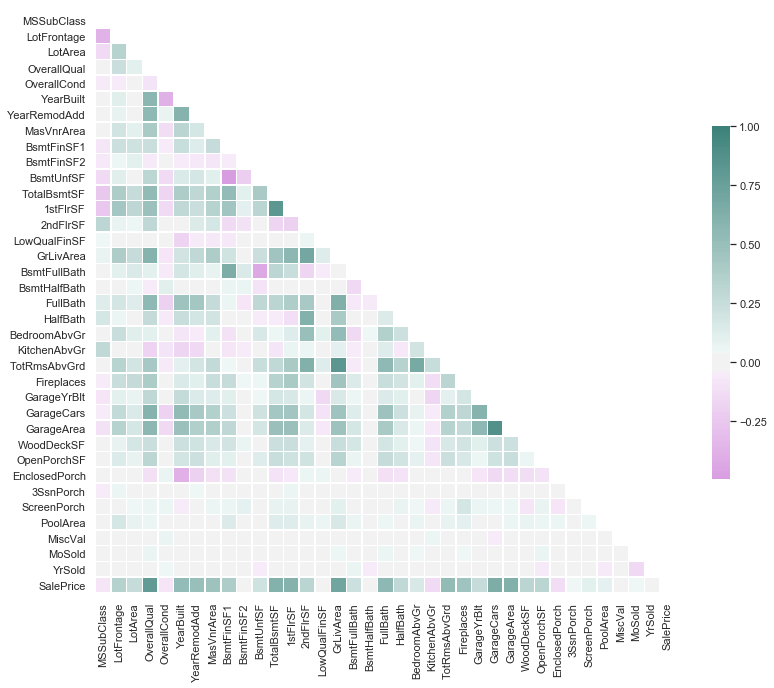

In [34]:
corr = df.select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr()

sns.set_style("whitegrid", {'axes.grid' : False})

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(300, 180, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [35]:
sns.set()

In [36]:
#Select the SalePrice correlation data and convert it to a dictionary
cor_dict=corr['SalePrice'].to_dict()

#Remove the correlation to itself
del cor_dict['SalePrice']

output = [
    print("{0}: \t{1}".format(*entry))
    for entry in sorted(cor_dict.items(), key = lambda x: x[1], reverse=True)
]

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
MasVnrArea: 	0.47261449900457725
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.3498756103224416
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
GarageYrBlt: 	0.2613664351029631
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MoSold: 	0.04643224522381936
3SsnPorch: 	0.04458366533574792
BsmtFinSF2: 	-0.011378121450215216
BsmtHalfBath: 	-0.016844154297359294
MiscVal: 	-0.02118957964030379
LowQualFinSF: 	-0.02560613000068

OverallQual seems highly correlated with Sale Price

### Visualizing OverallQual VS SalePrice

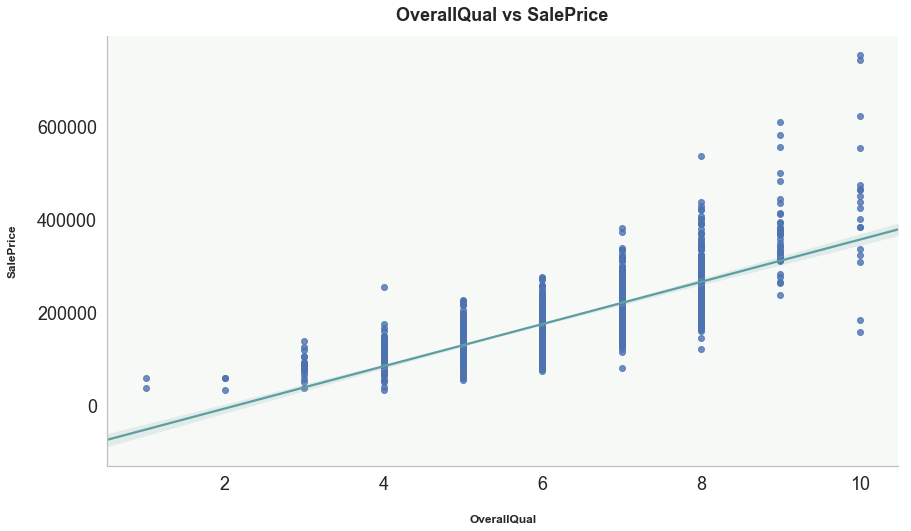

In [171]:
_ = sns.lmplot(
    x='OverallQual', y='SalePrice', data=df, 
    fit_reg=True, line_kws={'color': 'cadetblue'}, height=7, 
    aspect=1.8
)
plt.title('OverallQual vs SalePrice', fontsize=18)
set_plot_style()

### Visualizing Other Highly Correlated Features (Numerical)

Let's take a look at the distribution of lot area (LotArea):

The biggest lot size is 215,245.00 square feet, the smallest 1,300.00 square feet


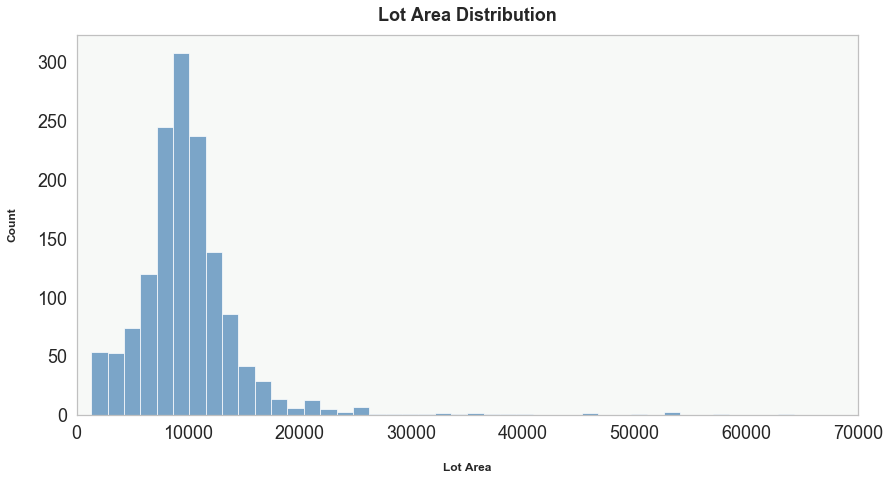

In [169]:
# Calculate the ideal number of bins, source: 
# https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram
bins = math.floor((max(df.LotArea) - min(df.LotArea))/len(df.LotArea))
fig, ax = plt.subplots(figsize=(14,7))
ax.set_title('Lot Area Distribution', fontsize=18)
ax.set_ylabel('Count')
ax.set_xlabel('Lot Area')
ax.set_xlim([0, 70000])
(df.LotArea).hist(bins=bins, rwidth=1, color='steelblue', alpha=.7)
set_plot_style()
print('The biggest lot size is {:,.2f} square feet, the smallest {:,.2f} square feet'.format(
    df.LotArea.max(), df.LotArea.min()))

We clearly see a very similar skew as observed in the Sale Price distribution plot. Also interesting to note is that there is one extremely large lot 215,245 square feet. 

Lets take a deeper look at the relationship between lot area and sale price

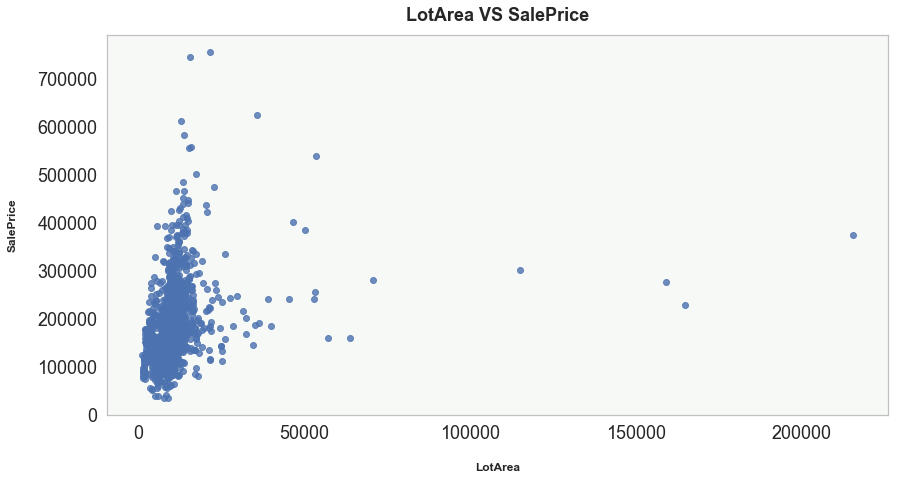

In [170]:
fig, ax = plt.subplots(figsize=(14,7))
ax.set_title('LotArea VS SalePrice', fontsize=18)
_ = sns.regplot(x='LotArea', y='SalePrice', data=df, fit_reg=False, ax=ax)
set_plot_style()

Its fairly hard to tell so lets filter this down a bit since there seem to be many outliers with respect to lot area:

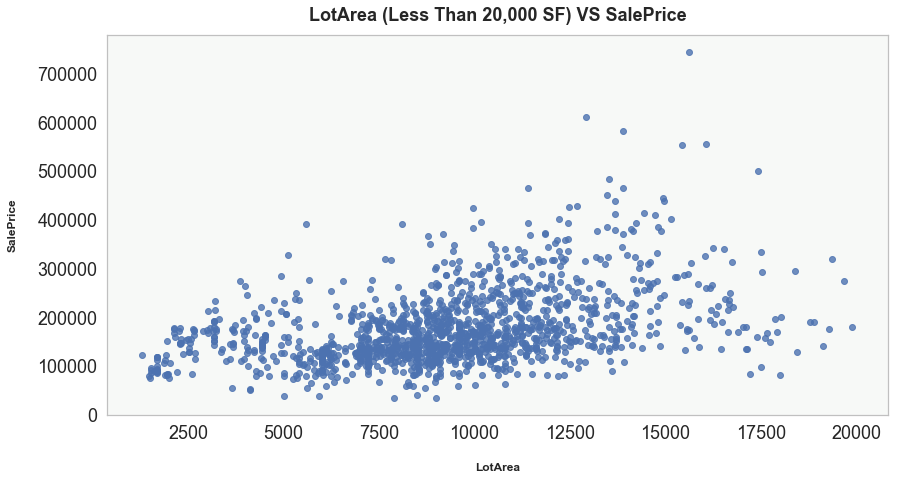

In [172]:
df_lot_area = df[df['LotArea'] < 20000]
fig, ax = plt.subplots(figsize=(14,7))
ax.set_title('LotArea (Less Than 20,000 SF) VS SalePrice', fontsize=18)
_ = sns.regplot(x='LotArea', y='SalePrice', data=df_lot_area, fit_reg=False, ax=ax)
set_plot_style()

There seems to be some relationship here, but its hard to tell and the salesprices seem to range widely for any given lot area. Given this i think we need to move on to other possibly more influential features.

## Sale Price Analyzed By Time Of Year

Another interesting hypothesis to investigate would be the influence on time of sale or year sold on the sales price of a home.  Lets take a  look at the distribution of home sales by year sold:

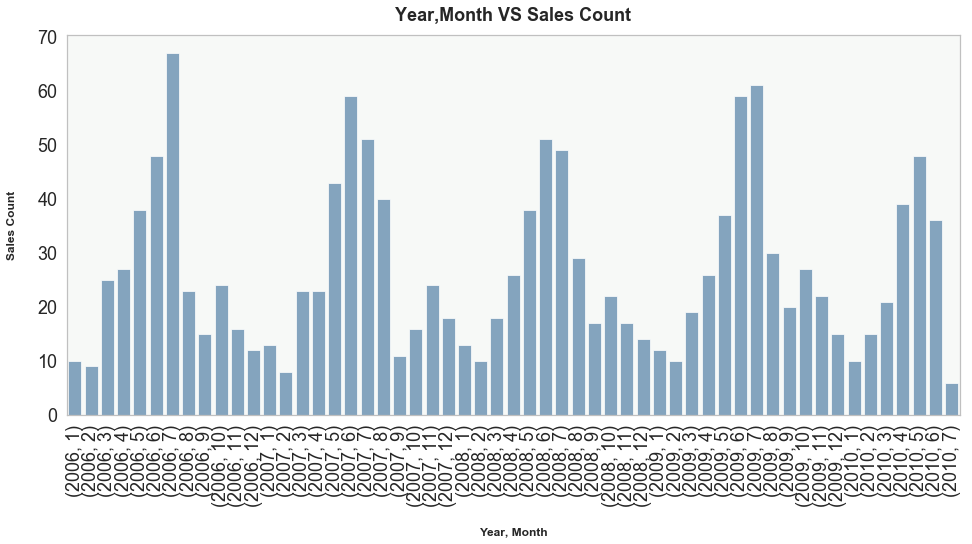

In [173]:
sales_by_year_month = df.groupby(['YrSold','MoSold']).size()# .plot(kind='bar', figsize=(14,4))
df_sales_by_year_month = pd.DataFrame(sales_by_year_month)
df_sales_by_year_month = df_sales_by_year_month.rename(columns={df_sales_by_year_month.columns[0]:'NumberOfSales'})

fig, ax = plt.subplots(figsize=(16,7))
ax.set_title('Year,Month VS Sales Count', fontsize=18)
sales_plot = sns.barplot(df_sales_by_year_month.index, df_sales_by_year_month.NumberOfSales, data = df_sales_by_year_month, ax=ax, 
                         color = 'steelblue', alpha=.7)
plt.xlabel("Year, Month")
plt.ylabel("Sales Count")
_= sales_plot.set_xticklabels(sales_plot.get_xticklabels(), rotation=90)
set_plot_style()

This is interesting! We see a very cyclical pattern hear where there is very high sales volume in summer months and very low sales volume during winter. Its almost perfectly consistent from the years 2006-2010 (the entire year range of the dataset). One hypothesis to test here is that this sales volume may effect sales price. For instance in months with very high volume, there is likely less market supply which may drive price up. Lets test this theory:

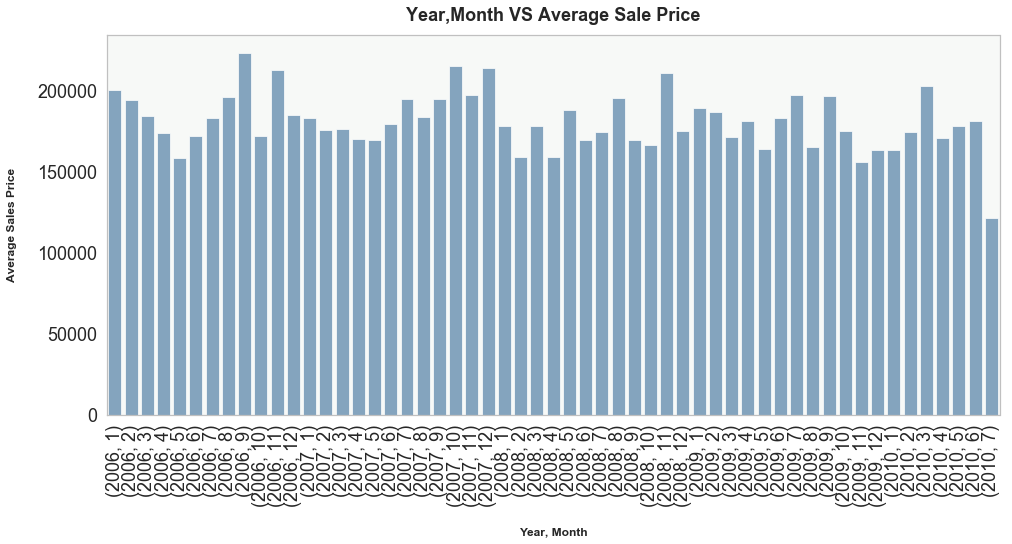

In [174]:
mean_sales_per_month = df.groupby(['YrSold','MoSold'])['SalePrice'].mean()
df_mean_sales_per_month = pd.DataFrame(mean_sales_per_month)


df_mean_sales_per_month = df_mean_sales_per_month.rename(columns={df_mean_sales_per_month.columns[0]:'AverageSales'})


fig, ax = plt.subplots(figsize=(16,7))
ax.set_title('Year,Month VS Average Sale Price', fontsize=18)
sales_mean_plot = sns.barplot(df_mean_sales_per_month.index, df_mean_sales_per_month.AverageSales, 
                              data = df_mean_sales_per_month, ax=ax, 
                              color = 'steelblue', alpha=.7)
plt.xlabel("Year, Month")
plt.ylabel("Average Sales Price")
_= sales_mean_plot.set_xticklabels(sales_plot.get_xticklabels(), rotation=90)
set_plot_style()

From this result there seems to be a trend, but not nearly as drastic as we would have expected based on the sales volume chart. The hypothesis seems somewhat true but hard to prove that just from this visualization. 

## Combining Some Features (Square Footage Features)

Yet another hypothesis to test is that square footage will ultimately drive sales price. It is quite intuitive to suggest that the larger a home, the higher its value. We see that there seems to be a linear relationship between GrLivArea, TotalBsmtSF and GarageArea. Lets do some feature engineering here to further test this hypothesis: 

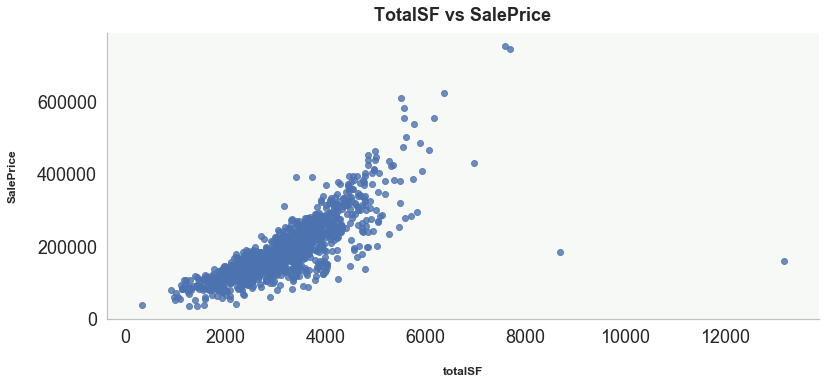

In [175]:
df['totalSF'] = df['GrLivArea'] + df['TotalBsmtSF'] + df['GarageArea']


sns.lmplot('totalSF', 'SalePrice', data=df, height=5, aspect=2.3, fit_reg = False)
_ = plt.title('TotalSF vs SalePrice', fontsize=18)
set_plot_style()

It really seems like there is a linear or almost exponential relationship between the total square footage of a home and the final sales price

Lets now examine the pearson corellation coefficients observed for totalSF and OverallQual in order to determine if there is any difference in their corellation with respect to SalePrice. From earlier results it was observed that OverallQual v Saleprice had a coefficient of .79, while totalSF and SalePrice had one of .8.

In [45]:
totalSF_pearson = stats.pearsonr(df['totalSF'],df['SalePrice'])
OverallQual_pearson = stats.pearsonr(df['OverallQual'], df['SalePrice'])

print('totalSF pearson: {}'.format(totalSF_pearson[0]))
print('totalSF pearson p-value: {}'.format(totalSF_pearson[1]))
print('OverallQual pearson: {}'.format(OverallQual_pearson[0]))
print('OverallQual pearson p-value: {}'.format(OverallQual_pearson[1]))

totalSF pearson: 0.8075184760515013
totalSF pearson p-value: 0.0
OverallQual pearson: 0.7909816005838051
OverallQual pearson p-value: 2.185675268e-313


By looking at the p-values for each of these tests we see that they are essentially 0 meaning a very high confidence that this corellation calculated is true.

### Testing For Statistical Significance:

Lets perform a bootstrap test to evaluate the probability of a value as high as .8 emerging in the distribution of pearson values for OverallQual. The following is the hypothesis we will refer to:


Ho: The Pearson coefficients of OverallQual and totalSF are equal

Ha: The totalSF parameter has a greater correlation to SalePrice

𝞪: .05


In [46]:
np.random.seed(42)
qual = draw_bs_reps([df['OverallQual'],df['SalePrice']], pearson_r, bootstrap_replicate_2d, 10000)
p = (np.sum(qual >= .8075185)/len(qual))
print(p)

0.05


In [47]:
np.random.seed(42)
totalSF = draw_bs_reps([df['totalSF'],df['SalePrice']], pearson_r, bootstrap_replicate_2d, 10000)
p = (np.sum(totalSF <= .7909816005838051)/len(totalSF))
print(p)

0.2886


In [48]:
stats.pearsonr(df['OverallQual'],df['SalePrice'])

(0.7909816005838051, 2.185675268e-313)

Given this percentile of .05 we would normally accept the null hypothesis, even though the value is on the threshold (not enough evidence to reject in this case).

## YearBuilt, YearRemodAdd VS SalePrice

Lets take a look at the relationship between year built ('YearBuilt') and sale price ('SalePrice'). The expectation is that the newer the home the more it will sell for. Lets test this hypothesis:

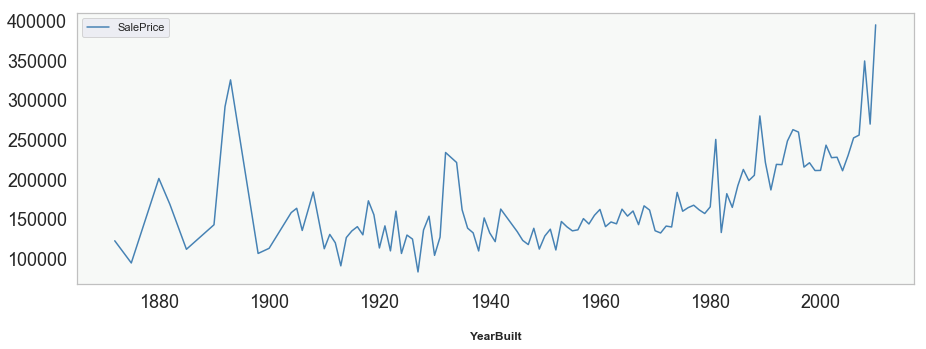

In [176]:
df_years = df[['YearBuilt', 'SalePrice']]
_ = df_years.groupby(['YearBuilt']).mean().plot(figsize=(15,5), color='steelblue')
set_plot_style()

The resultant graph shows that there is an observable trend. Whats interesting to note is that there is a spike in value between 1890 to 1900. Perhaps this is due to some desirable architectural style which dominated that particular period. This may be worth looking into in the future.

Lets examine if a similar relationhip can be seen with the year a remodel was added to the home (YearRemodAdd):

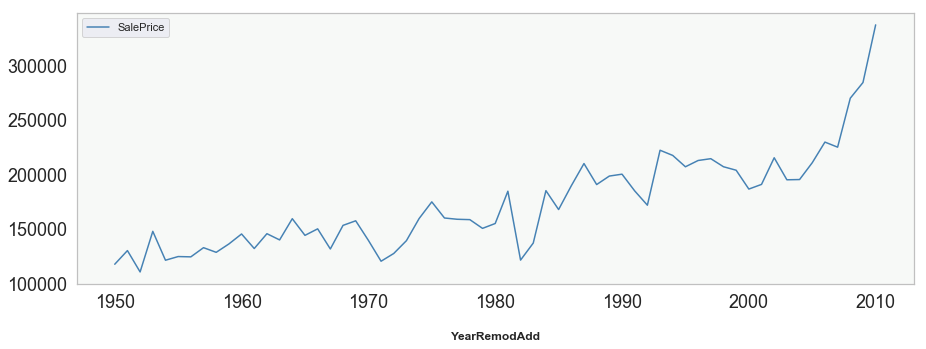

In [177]:
df_years = df[['YearRemodAdd', 'SalePrice']]
_ = df_years.groupby(['YearRemodAdd']).mean().plot(figsize=(15,5), color='steelblue')
set_plot_style()

A similar trend exists with respect to year built. Looks to be almost linear or exponential with respect to sales price. This is somewhat intuitive. Remodeling a home will always add value and the later its remodeled the more valuable this enhancement becomes.

## Location, Location, Location

The next hypothesis to test will be location. Since when it comes to property, they always say 'location, location, location!'. Lets take a look at how sales price varies based on location in Ames Iowa.

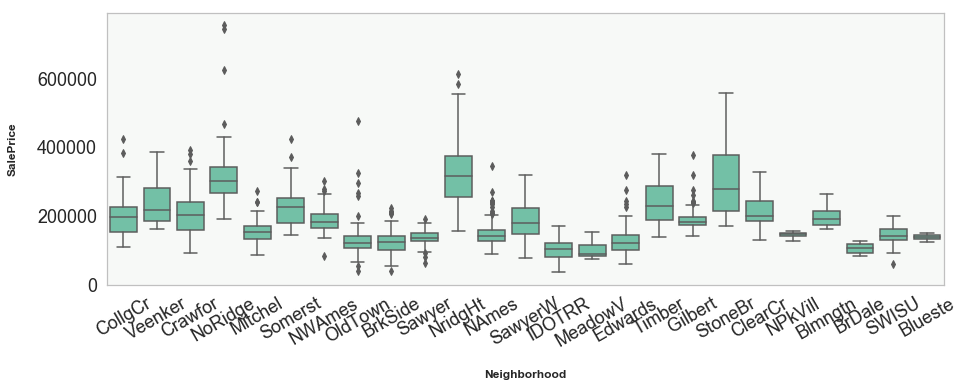

In [178]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, color='mediumaquamarine')
xt= plt.xticks(rotation=30)
set_plot_style()

Its a quite interesting result. Seems that there is a lot of variance between the boxplots here which indicates that the neighborhood truly matters in determining sale price. We can say that this hypothesis is validated by this result.

### Mean Sale Price By Neighborhood

Lets look at mean sales price by neighborhood:

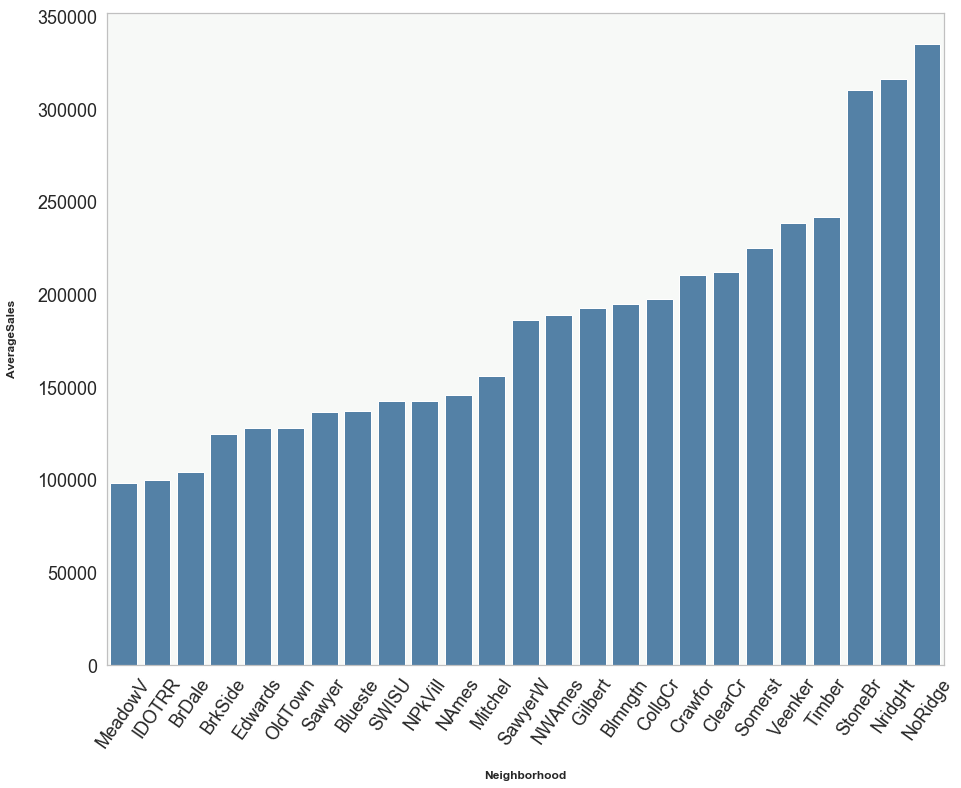

In [184]:
fig, ax = plt.subplots(1, 1, figsize = (15, 12))
df_Neighborhood = df.groupby(['Neighborhood'])['SalePrice'].mean()
df_Neighborhood = pd.DataFrame(df_Neighborhood)
df_Neighborhood = df_Neighborhood.rename(columns={df_Neighborhood.columns[0]:'AverageSales'})
df_Neighborhood = df_Neighborhood.sort_values(by='AverageSales')
x = plt.xticks(rotation = 55)
_ = sns.barplot(df_Neighborhood.index, df_Neighborhood.AverageSales, data = df_Neighborhood, ax=ax, color = 'steelblue')
set_plot_style()


Seems like there are three neighborhoods with average sales significantly higher than the rest. Lets test statistical significance between neighborhoods. For this test we will look at the lowest average sales 'MeadowV' vs 'Timber' (the neighborhood with highest average sales excluding the 3 potential outliers StoneBr, NridgeHt, NoRidge). 

**Lets create the following frequentest style hypothesis test:**

**Ho** = There is no difference between mean of MeadowV and Timber home sale prices. 

**Ha** = The means are not equal (two tailed test)

**Alpha** = Lets use an alpha value of .05 or 5%

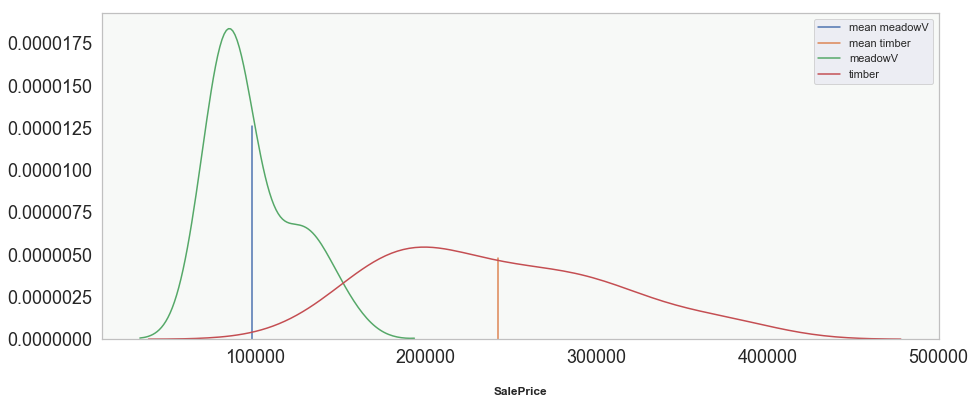

In [180]:
#Filter data for each neighborhood

meadowV = df[df['Neighborhood'] == 'MeadowV']['SalePrice']
timber = df[df['Neighborhood'] == 'Timber']['SalePrice']

#Calculate summary statistics

mean_meadowV = meadowV.mean()
mean_timber = timber.mean()

std_meadowV = np.std(meadowV)
std_timber = np.std(timber)

#Plot distributions to create a visualization
plt.figure(figsize=(15, 6))

plt.plot([mean_meadowV, mean_meadowV],[0.0,.0000126], label="mean meadowV")
plt.plot([mean_timber, mean_timber],[0.0,.0000048], label="mean timber")
sns.distplot(meadowV, hist=False, label="meadowV")
_ = sns.distplot(timber, hist=False, label="timber")

set_plot_style()

Seems the distributions vary significantly from each other. Lets confirm this with the z-test

In [54]:
#Calculate the standard dev for the distributions
sigma = np.sqrt((std_meadowV**2)/len(meadowV) + (std_timber**2)/len(timber))
sigma

11759.927357269155

In [55]:
#Calculate the z value
diff_of_means = mean_meadowV - mean_timber

z = (diff_of_means - 0)/(sigma)

print('z-value:', z)

z-value: -12.2169952598711


In [56]:
p_val_from_z = stats.norm.cdf(z)*2

print('p-value: ', p_val_from_z)

p-value:  2.5223623931987262e-34


So given this p-value its very clear that we can reject the null hypothesis and assert that the difference in means between neighborhoods is statistically significant. What about other neighborhoods? Lets consider all neighborhoods and evaluate statistical significance for each against the others.

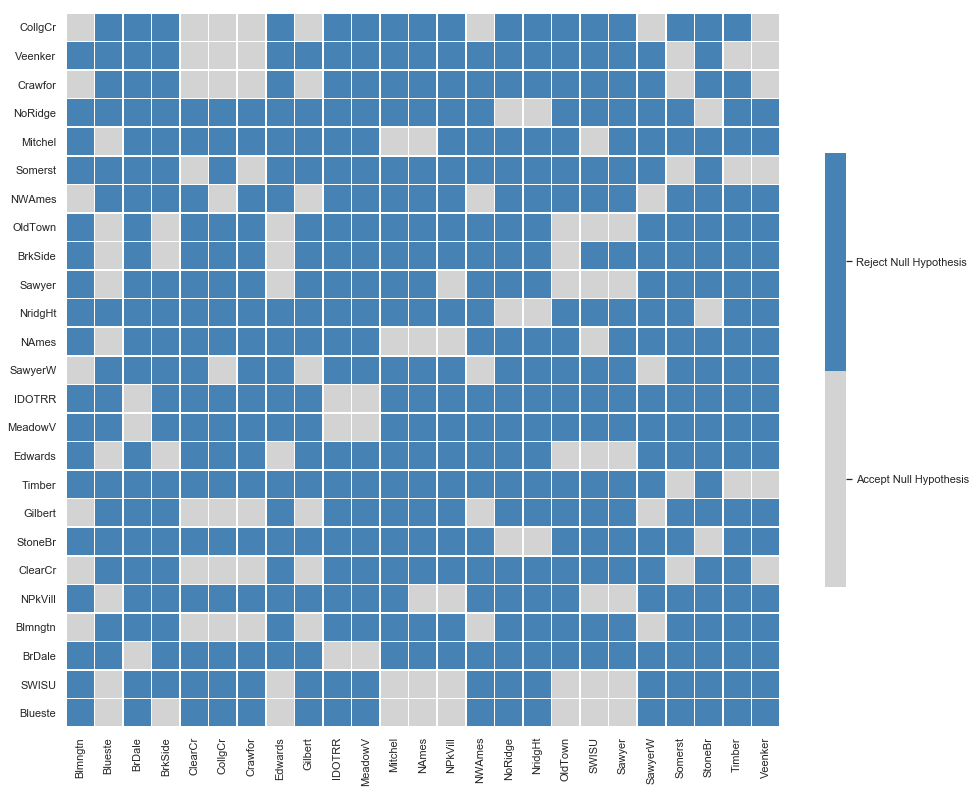

In [57]:

items = get_data_to_compare(list(df['Neighborhood'].unique()))
dfnew = pd.DataFrame(index=list(df['Neighborhood'].unique()))

all_stats = [calculate_p_for_mean_diff(item[0],item[1],.05,df, 'SalePrice', 'Neighborhood') for item in items]

#Need to restructure the result from the statistics tests into a dict in order to convert this to a dataframe
data_dict = {}
for idx in dfnew.index:
    data_list = []  
    for col in dfnew.index:
        for stat in all_stats:
            if col in stat and idx in stat:
                if col == idx:
                    data_list.append(False)
                else:
                    data_list.append(stat[3])
                break
                
    data_dict[idx] = data_list
    
new_df = pd.DataFrame(data_dict)
new_df = new_df.set_index(dfnew.index)


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# # Generate a custom binary colormap
colors = ["lightgrey", "steelblue"] 
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))


# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(new_df, cmap=cmap,square=True,  linewidths=.5, cbar_kws={"shrink": .5})

# Set the colorbar labels
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels(['Accept Null Hypothesis', 'Reject Null Hypothesis'])

In [58]:
np.sum(np.sum(new_df))

494

 We see some neighborhoods where differences can be ignored but for the most part, these differences cant be ignored. In almost all cases we must reject the null hypothesis that the means are the same in favor of the alternate.

Since we have so many p-tests there is quite a large chance that we are introducing some Type I errors. To correct for this we will try  the conservative approach of the Bonferroni correction. This states that when making a large number of statistical comparisons it makes sense to reduce the alpha value. This is done by dividing the alpha used by the number of comparisons being made. In this case we have 25x25 = 625. So then we will use an alpha of .05/625 = .00008

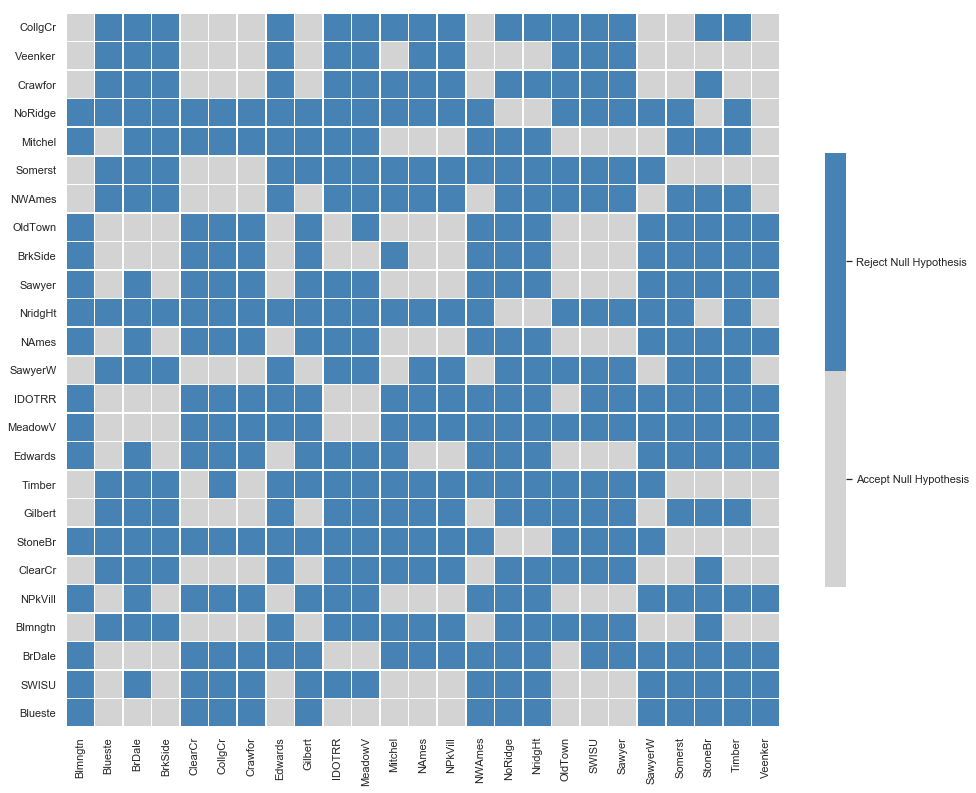

In [59]:
items = get_data_to_compare(list(df['Neighborhood'].unique()))
dfnew = pd.DataFrame(index=list(df['Neighborhood'].unique()))

all_stats = [calculate_p_for_mean_diff(item[0],item[1],.00008,df, 'SalePrice', 'Neighborhood') for item in items]

#Need to restructure the result from the statistics tests into a dict in order to convert this to a dataframe
data_dict = {}
for idx in dfnew.index:
    data_list = []  
    for col in dfnew.index:
        for stat in all_stats:
            if col in stat and idx in stat:
                if col == idx:
                    data_list.append(False)
                else:
                    data_list.append(stat[3])
                break
                
    data_dict[idx] = data_list
    
new_df = pd.DataFrame(data_dict)
new_df = new_df.set_index(dfnew.index)


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# # Generate a custom binary colormap
colors = ["lightgrey", "steelblue"] 
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))


# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(new_df, cmap=cmap,square=True,  linewidths=.5, cbar_kws={"shrink": .5})

# Set the colorbar labels
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels(['Accept Null Hypothesis', 'Reject Null Hypothesis'])

In [60]:
np.sum(np.sum(new_df))

414

So its clear from this figure that most differences in mean sale prices per neighborhood are statistically significant in most cases. Even with the Bonnferroni method applied we can still see that a majority of means differed vastly from each other.

## Condition1 and Condition2 VS SalePrice

Next lets take a look at Condition1 and Condition2. These are features which specify the proximity to certain city conditions (example PosN indicates a positive off-site feature including a park). My suspicion is that placement next to a positive feature such as a park will increase sales price of that home.

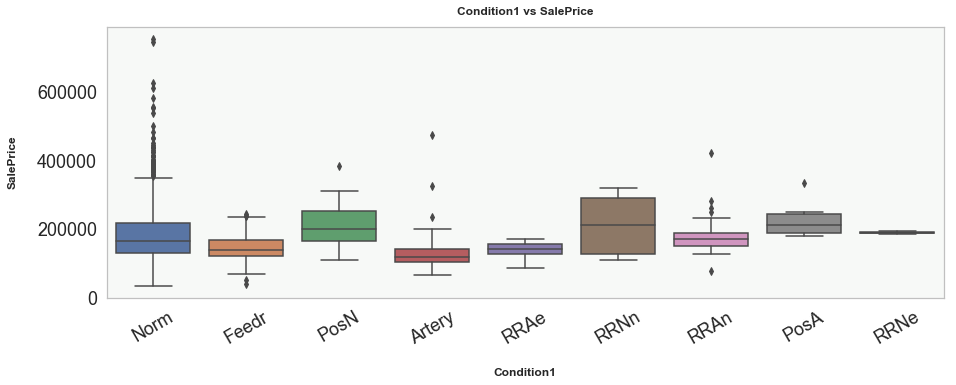

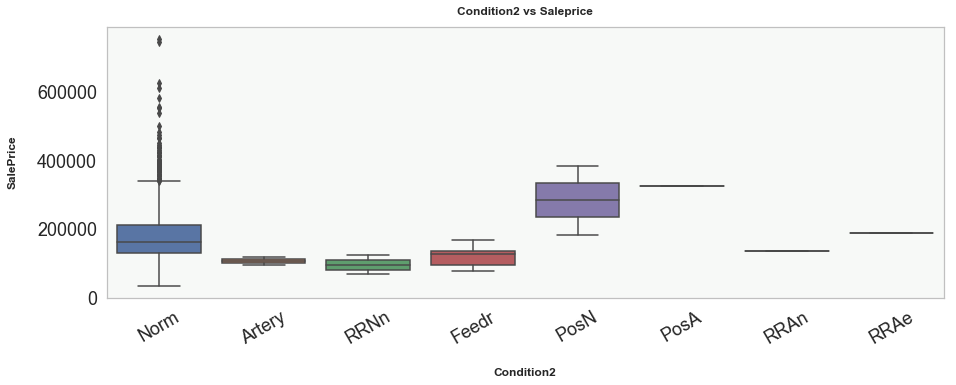

In [187]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'Condition1', y = 'SalePrice',  data = df)
plt.title('Condition1 vs SalePrice')
x = plt.xticks(rotation = 30)
set_plot_style()

plt.figure(figsize=(15,5))
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = df)
#duplicate data with condition1 and 2 (unmelting)
plt.title('Condition2 vs Saleprice')
x = plt.xticks(rotation = 30)
set_plot_style()

From the results this is clearly true! We can establish that having a positive off-site feature will directly influence sales price of that home. Lets combine these two into a grouped boxplot for side by side comparison:

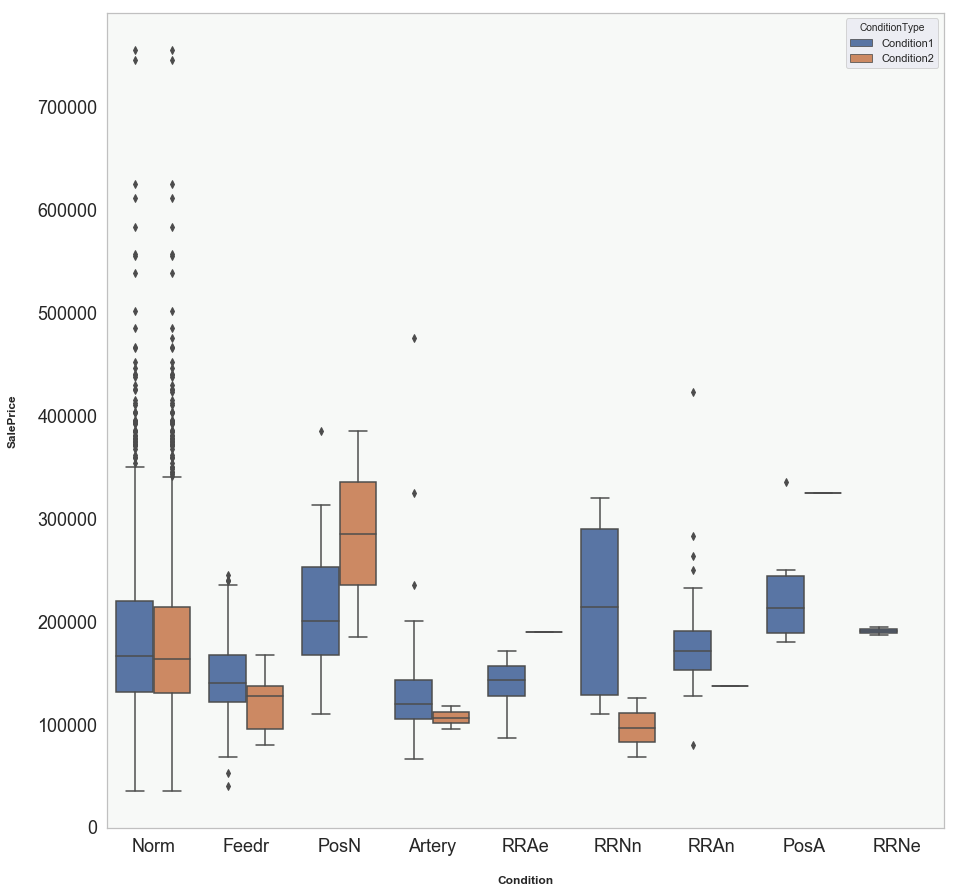

In [189]:
selected_data = df[['SalePrice', 'Condition1', 'Condition2']].set_index('SalePrice')
stacked_data = selected_data.stack()
stacked_data = stacked_data.reset_index()
stacked_data.columns = ['SalePrice', 'ConditionType', 'Condition']
stacked_data.head()


fig, ax = plt.subplots(figsize = (15, 15))
_ = sns.boxplot(x = 'Condition', y = 'SalePrice', hue= 'ConditionType',  data = stacked_data, ax = ax)
set_plot_style()

## KitchenQual VS Saleprice

Lets take a look at kitchen quality denoted by the 'KitchenQual' variable:

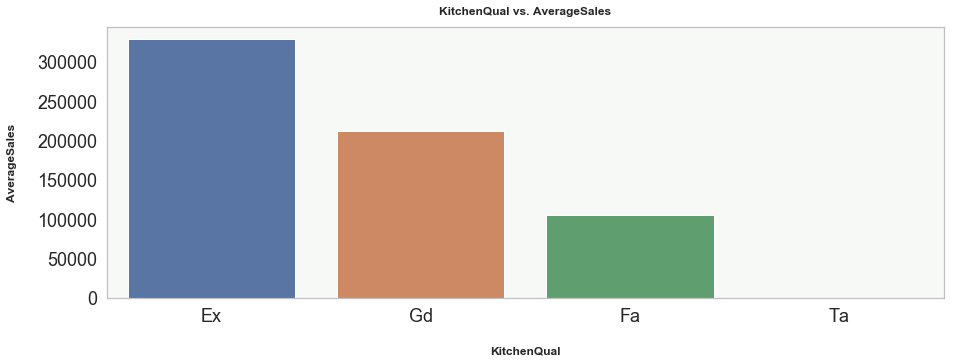

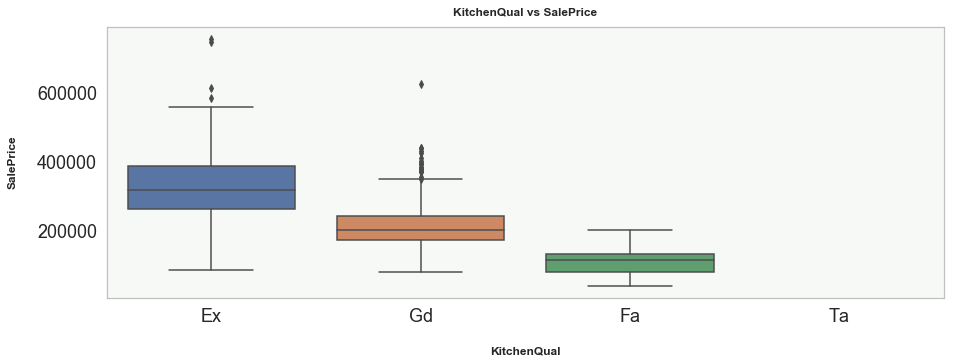

In [190]:


df_kitchenQuality = df.groupby(['KitchenQual'])['SalePrice'].mean()
df_kitchenQuality = pd.DataFrame(df_kitchenQuality)
df_kitchenQuality = df_kitchenQuality.rename(columns={df_kitchenQuality.columns[0]:'AverageSales'})

plt.figure(figsize=(15,5))
_ = sns.barplot(df_kitchenQuality.index, df_kitchenQuality.AverageSales, data = df_kitchenQuality, order =['Ex','Gd', 'Fa', 'Ta'])
plt.title('KitchenQual vs. AverageSales')
set_plot_style()

plt.figure(figsize=(15,5))
_= sns.boxplot(df.KitchenQual, df.SalePrice, data=df, order =['Ex','Gd', 'Fa', 'Ta'])
plt.title('KitchenQual vs SalePrice')
set_plot_style()

There is a clear relationship here between quality of a kitchen and the sales price. Its fairly obvious from these visuals that kitchen quality matters a lot when it comes to the final sale price of a home.

## SaleCondition VS SalePrice

Lets also examine the 'SaleCondition' feature. For this feature new homes are associated with the 'Partial' value. A hypothesis to test here would be that newer homes would fetch a higher sale price.

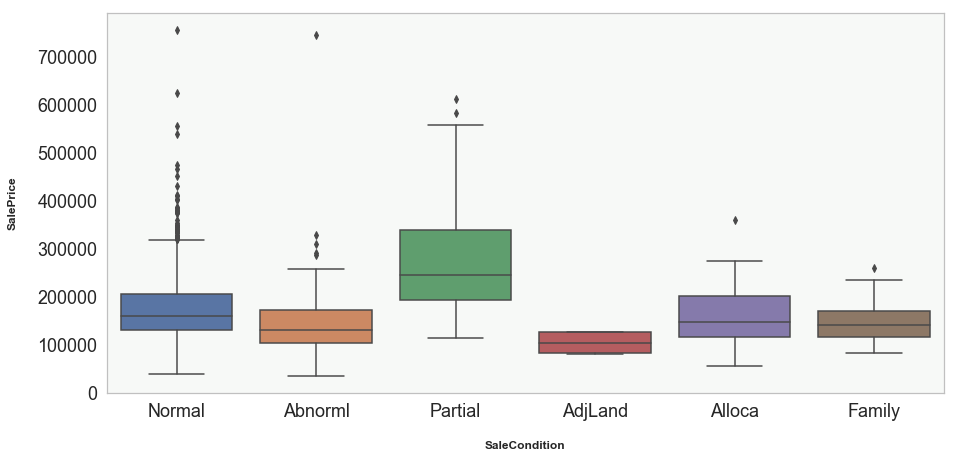

In [192]:
fig, ax = plt.subplots(figsize = (15, 7))
_ = sns.boxplot(x="SaleCondition", y="SalePrice", data=df, ax=ax)
set_plot_style()

Its pretty clear from the boxplots here that Abnorml sales will have a lower mean sale price while partial sales (or sales of newer homes) will rise significantly above the rest.

## ExterCond VS SalePrice

Lets check on the 'ExterCond' feature which determines the exterior condition of the home. Our assumption here is that excellent exterior condition will drive up sales price

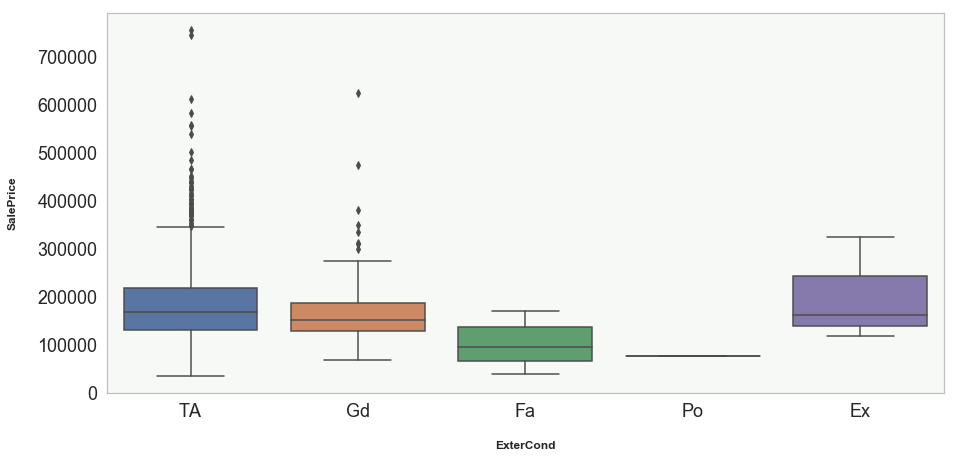

In [193]:
fig, ax = plt.subplots(figsize = (15, 7))
_ = sns.boxplot(x="ExterCond", y="SalePrice", data=df, ax=ax);
set_plot_style()

Looks like our assumption is somewhat validated byt his visualization. Seems like there is an observable difference betwen exccellent vs. poor condition exteriors

Since we are on the topic of exteriors, lets see if exterior material has anything to do with sale price. There are two variables which establish the exterior condition: 'Exterior1st' and 'Exterior2nd'

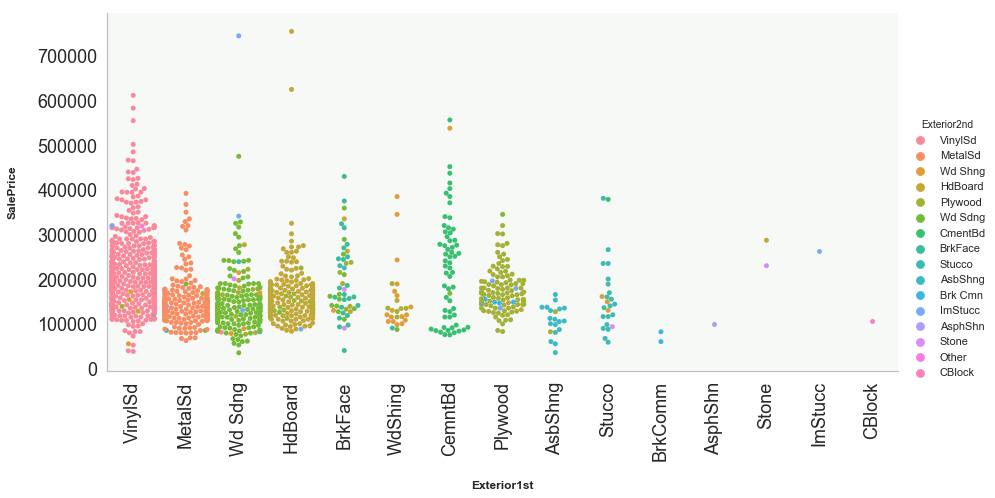

In [196]:
_ = sns.catplot(x="Exterior1st", y="SalePrice", data=df, kind="swarm", height=6, aspect=2.1, hue='Exterior2nd')
plt.xticks(rotation='vertical')
set_plot_style()

This is quite an interesting result. From the visual we can see that very rarely is there a secondary covering of different type than the initial covering.

## Dwelling Type (MSSubClassCat) VS SalePrice

In order to put some meaning on the MsubClass field (a field which establishes the type of dwelling), I think its useful to convert the integer values to their representative descriptions (provided in the data dictionary). In order to do this, we create a dictionary and convert these values using the pandas 'astype' function: 

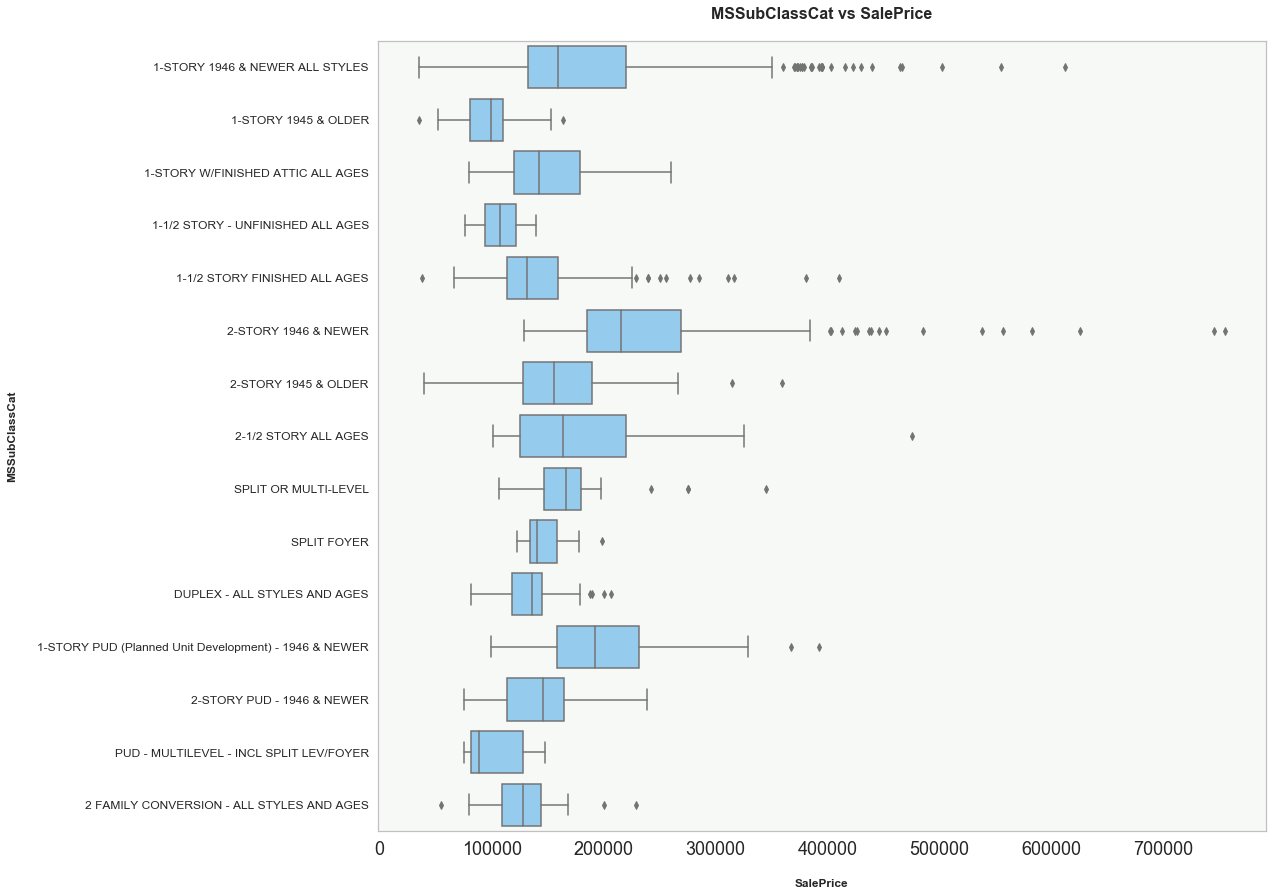

In [204]:
subClassDict = {
        20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'
}

MSSubClassCat = df['MSSubClass'].astype('category')

df['MSSubClassCat'] = MSSubClassCat.cat.rename_categories(subClassDict)
plt.figure(figsize=(20,12))
sns.boxplot(x='SalePrice', y='MSSubClassCat', data=df, orient='h', color='lightskyblue')
plt.tight_layout()
plt.title('MSSubClassCat vs SalePrice', fontsize=16)
plt.yticks(fontsize=12)
set_plot_style()

These results are quite interesting since we see a highly varying distribution of Sale Price with respect to the MSSubClass field. This indicates a strong corellation between MSSubClass and SalePrice. 

## Visualizing Remaining Categorical Features

Lets plot the rest of the categorical features to make sure we havent missed any relevant features in our analysis:

In [308]:
def box_plot_mapper(data, ydata, color):
    set_plot_style()
    ax = plt.gca()
    ax.set_xticklabels(fontsize=10)
    plt.xticks(rotation='vertical')
    sns.boxplot(data, ydata)

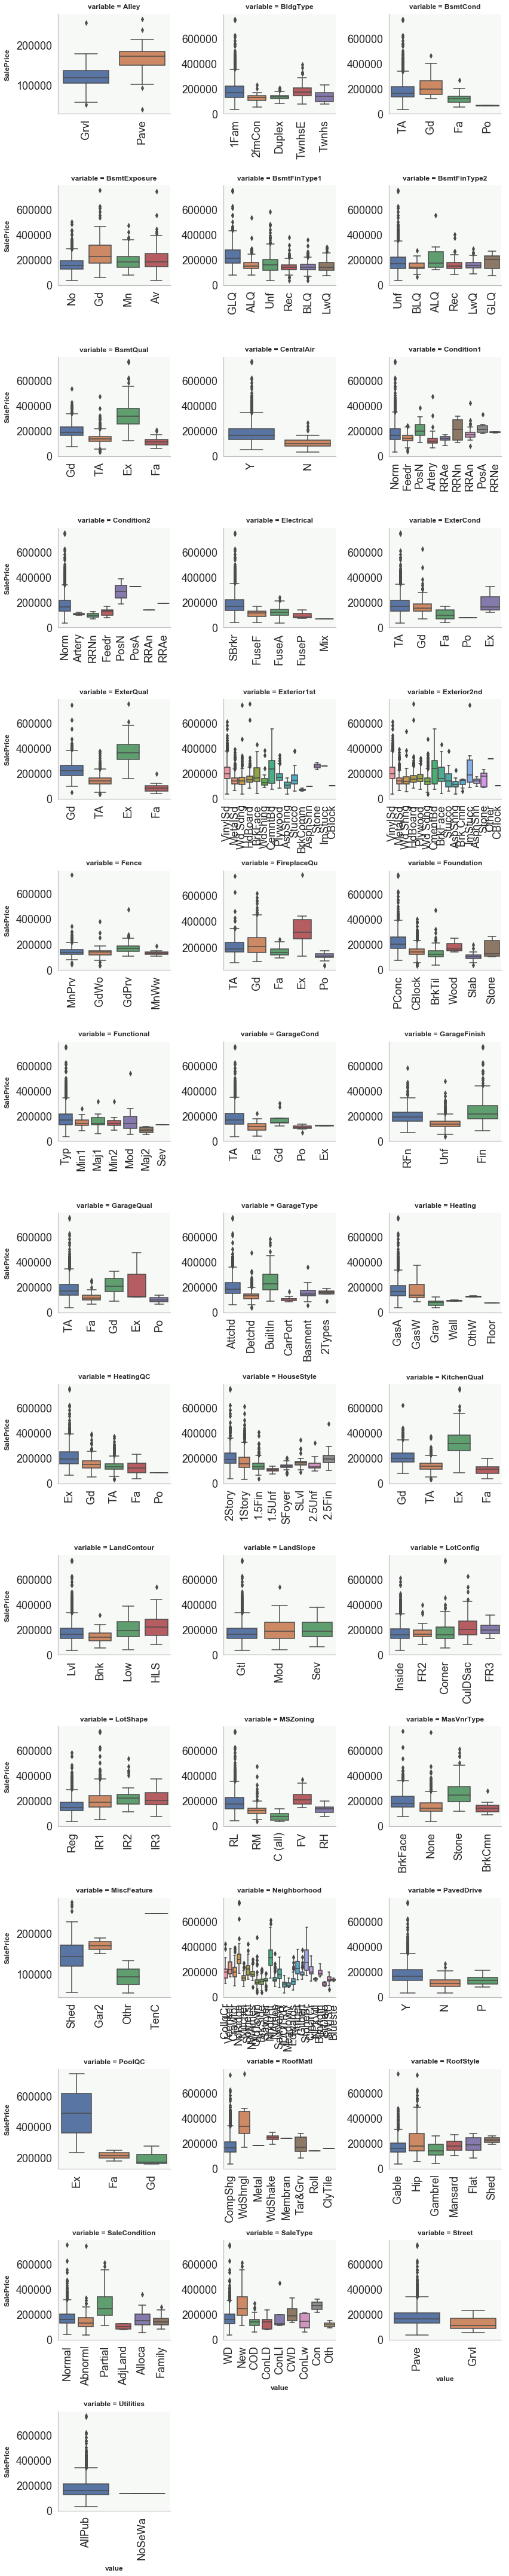

In [309]:
# Count plots of categorical features
categorical_features = list(df.select_dtypes(include=['object']).columns)

f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(categorical_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)

#Pass plot_mapper to g.map (facetgrid.map function accepts any plotting function so we use plot_mapper to set the style)
g = g.map(plot_mapper, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
# set_plot_style()
# plt.show()

## Visualizing Remaining Numerical Features

Finally lets do the same for the numerical data, to make sure we havent missed anything significant:

In [296]:
def reg_plot_mapper(data, ydata, color):
    
    set_plot_style()
    plt.xticks(rotation='vertical', fontsize=12)
    plt.yticks(fontsize=12)
    f = plt.gcf()
    f.set_figheight(40)
    f.set_figwidth(12)
    sns.regplot(data, ydata)

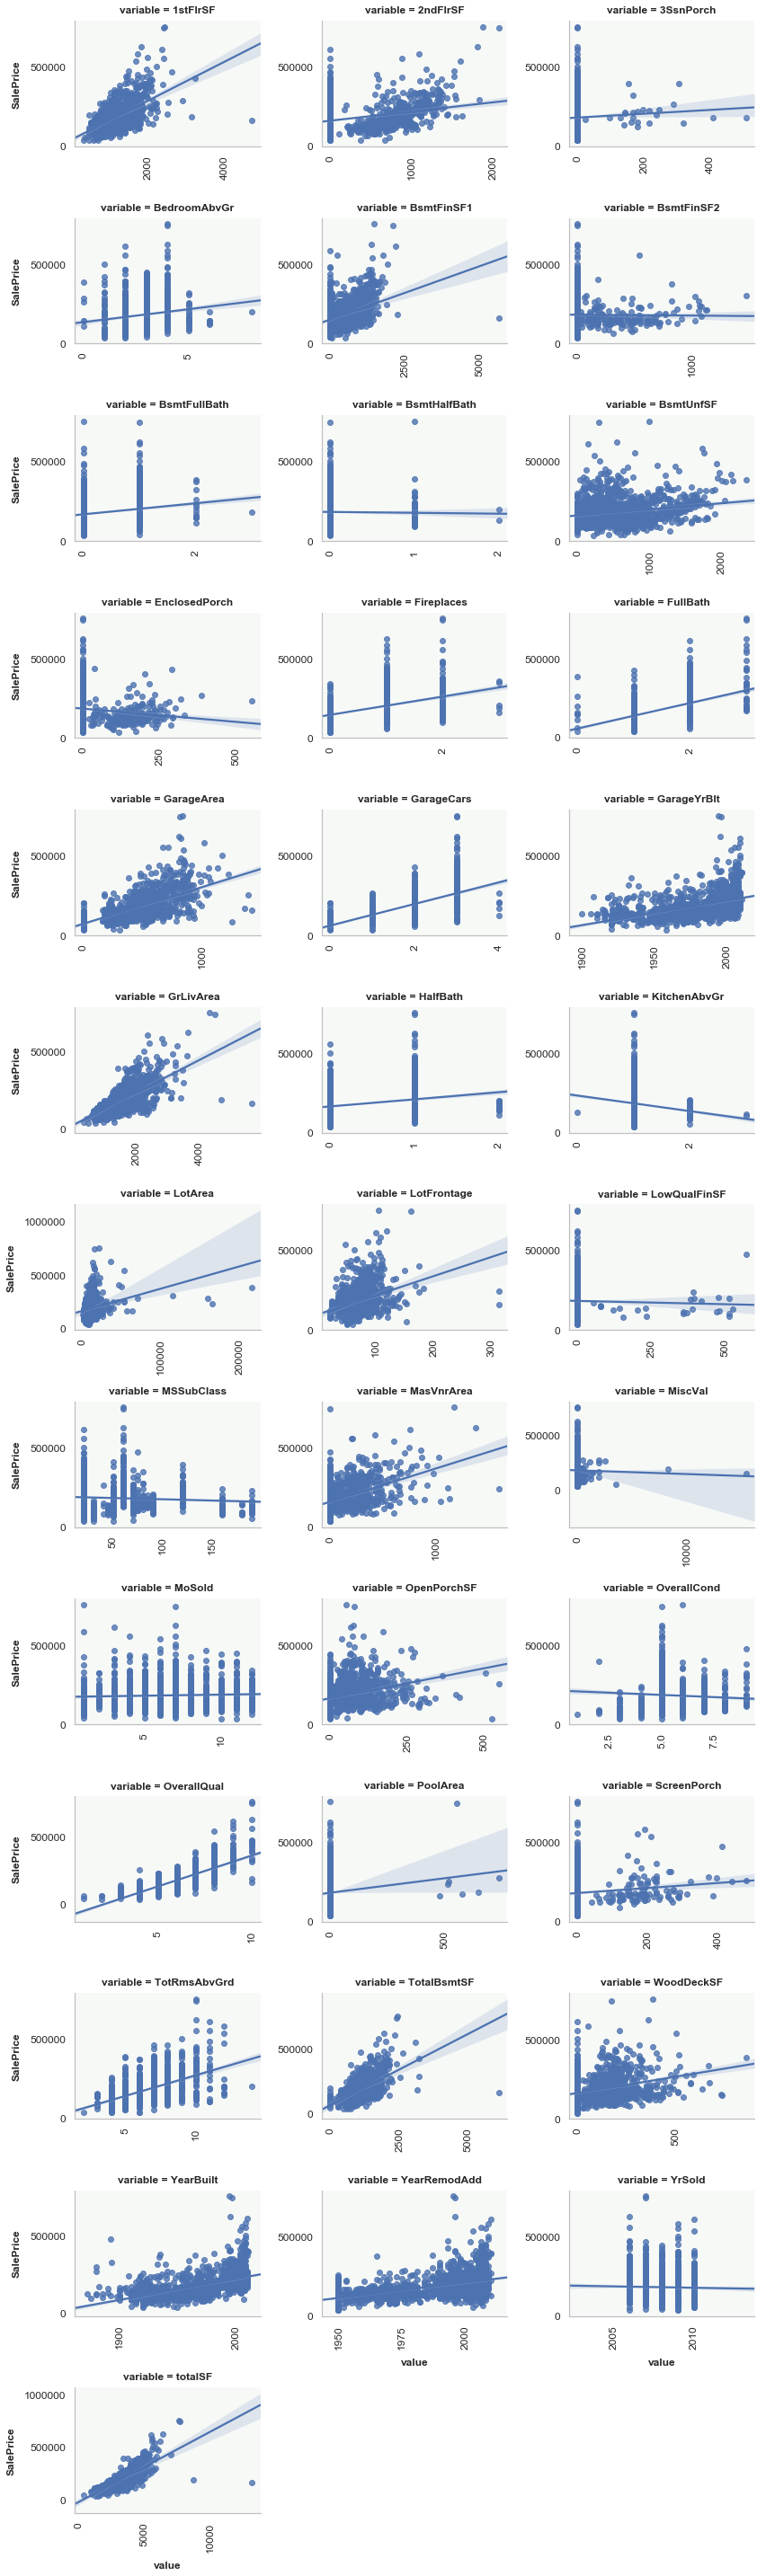

In [297]:
# Scatter plots of numerical features against SalePrice
numerical_features = df.select_dtypes(include=['int64','float64']).columns
numerical_features = numerical_features.drop(['Id','SalePrice']) # drop ID and SalePrice
numerical_features = list(numerical_features)


f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(numerical_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(reg_plot_mapper, 'value', 'SalePrice')

plt.show()

Some interesting take aways from this visual. We can see that very few homes have a pool so its tough to determine if pool area has any influence here. Also the number of bedrooms above ground, seems to correlate well with sale price (TotRmsAbovGnd). 

Also worth noting, WoodDeckSF seems to have a corellation with sale price. But we see that several homes were sold at a high price even without a wood deck. Perhaps a bit more feature engineering (such as adding this into the totalSF) would be worthwhile.  

# Regression Modeling and Analysis

## Automating Regression Analysis

Lets write some code to automate the process above for all types of regressors used

In [70]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

def fit_and_score(target, features, model, param_grid, random=True, print_results=True, test_size=.4, cv=5):
    
    # Create train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.4, random_state=42)
    
    if random:
        model_cv = RandomizedSearchCV(model, param_grid, cv=cv, random_state=50)
    else:
        model_cv = GridSearchCV(model, param_grid, cv=5)

    model_cv.fit(X_train, y_train)
    y_pred = model_cv.predict(X_test)
    r_squared = model_cv.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    
    print("The R squared score: {}".format(r_squared))
    print("Optimized Hyperparameters: {}".format(model_cv.best_params_))
    print("The Mean Squared Error or MSE: {}".format(mse))
    
    return {'model':model_cv, 'y_pred':y_pred, 'y_test':y_test, 'target_features':X_test,
            'r_squared':r_squared, 'mse':mse}


def plot_fitted_vs_actual(y_test, y_pred):
    
    plt.figure(figsize=(16,8))
    plt.scatter(y_test, y_pred, alpha=.56, color='#2951a0')
    plt.title('Actual Sale Price vs. Predicted Sale Price', fontsize=18)
    plt.ylabel('Predicted Sale Price', fontsize=14)
    _ = plt.xlabel('Actual Sale Price', fontsize=14)
    set_plot_style()
    
def plot_fitted_vs_resid(y_test, y_pred):
    
    residuals = y_test - y_pred
    
    plt.figure(figsize=(16,8))
    plt.scatter(y_pred, residuals, alpha=.56, color='#2951a0')
    plt.title('Residuals vs. Fitted Values', fontsize=18)
    plt.ylabel('Residuals', fontsize=14)
    _ = plt.xlabel('Fitted Values', fontsize=14)
    set_plot_style()


## Linear Regression

Next lets try to fit a linear regression model using sklearn. First we will use only numerical columns

In [71]:
results_list_reg = []
X = df.select_dtypes(include=['int64','float64'])
#remove target variable
X = X.drop('SalePrice', axis=1)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lm = LinearRegression()

lm.fit(X, df.SalePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Lets take a look at the intercept and coefficients**

In [74]:
lm.intercept_

407835.6483733233

In [75]:
# The coefficients
coeff = pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]
coeff.head(10)

features  estimatedCoefficients
0            Id              -1.097228
1    MSSubClass            -186.397756
2   LotFrontage             -99.192707
3       LotArea               0.430012
4   OverallQual           17328.517335
5   OverallCond            5140.280987
6     YearBuilt             345.638715
7  YearRemodAdd             118.773008
8    MasVnrArea              28.265472
9    BsmtFinSF1               6.489245

Lets examine the predicted prices vs. the actual prices 

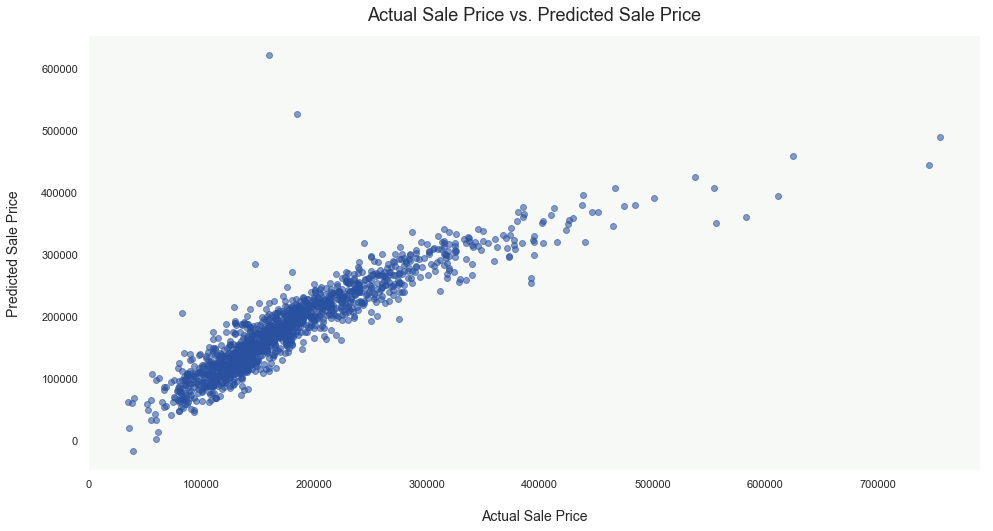

In [76]:
predicted = lm.predict(X)
plot_fitted_vs_actual(df.SalePrice, predicted)

In [77]:
lm.score(X, df.SalePrice)

0.8168872184107768

Right away we can see that the relationship does well in the range of 50,000 to 350,000 yet beyond that it is underpredicting quite significantly. Also there are a couple outliers which are being overpredicted  (expected roughly 200k yet predicting 500-600k range)

In [78]:
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'totalSF'],
      dtype='object')

Lets ensure we have all duplicate columns removed. First lets eliminate 'GrLivArea', 'TotalBsmtSF' and 'GarageArea' since these columns were consolidated into the new totalSF feature

In [79]:
X = X.drop(['GrLivArea','TotalBsmtSF','GarageArea'], axis=1)

In [80]:
lm.fit(X, df.SalePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

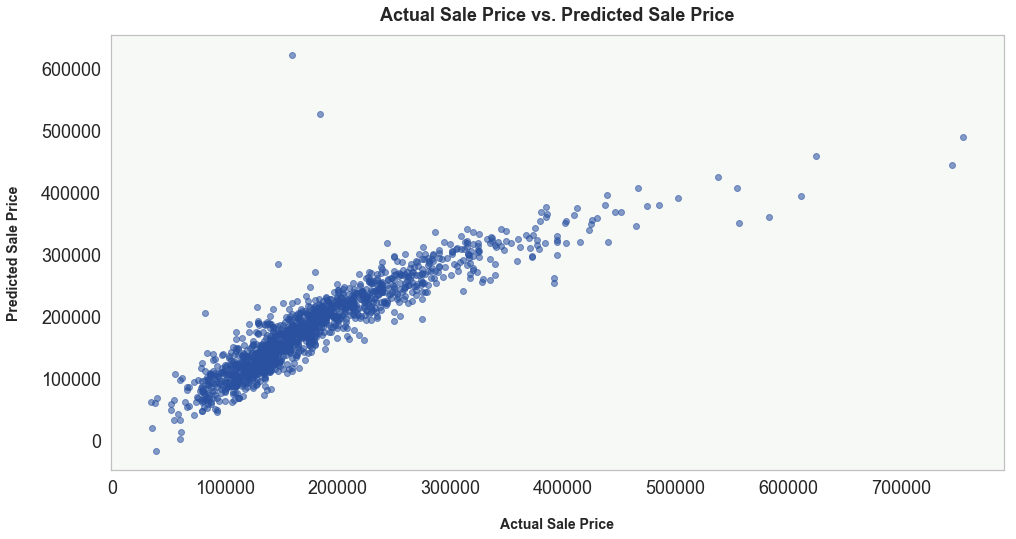

In [81]:
predicted = lm.predict(X)
plot_fitted_vs_actual(df.SalePrice, predicted)

In [82]:
lm.score(X, df.SalePrice)

0.8168872184107767

Not much of a difference here, so perhaps we need to add in some of the categorical features to see if this could improve our fit. Lets try to add in neighborhood.

In [83]:
d = pd.concat([X, pd.get_dummies(df['Neighborhood'], prefix='Neighborhood')], axis=1)
d.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'totalSF',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       

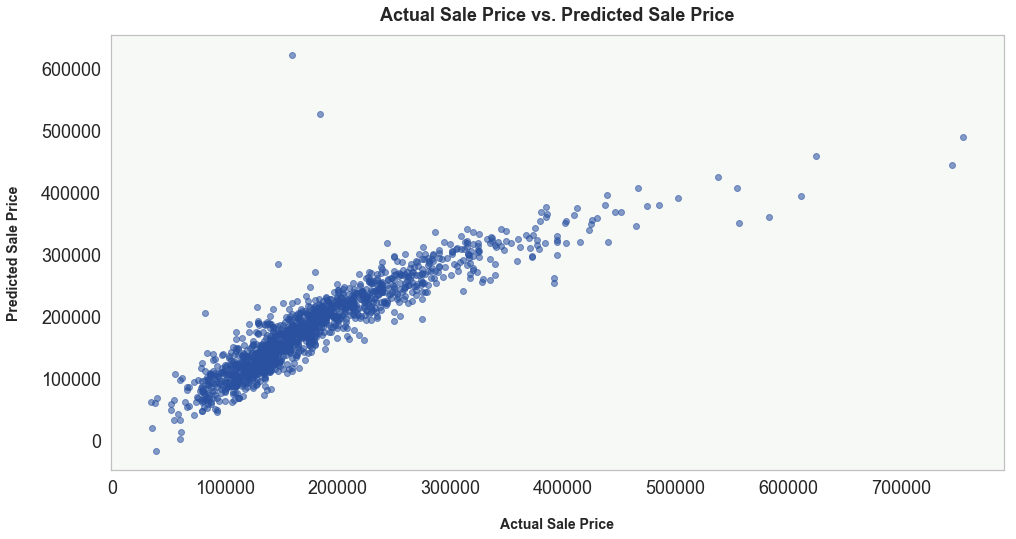

In [84]:
lm.fit(X, df.SalePrice)
predicted = lm.predict(X)
plot_fitted_vs_actual(df.SalePrice, predicted)

In [85]:
lm.score(X, df.SalePrice)

0.8168872184107767

lets add in all other categorical variables

In [86]:
categorical_features = list(df.select_dtypes(include=['object']).columns)
categorical_features.remove('Neighborhood')

for feature in categorical_features:
    X = pd.concat([X, pd.get_dummies(df[feature], prefix=feature)], axis=1)

X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=276)

In [87]:
result = fit_and_score(df.SalePrice, X, lm, {})
results_list_reg.append(result['r_squared'])

The R squared score: 0.8668424128662224
Optimized Hyperparameters: {}
The Mean Squared Error or MSE: 965075183.9980252


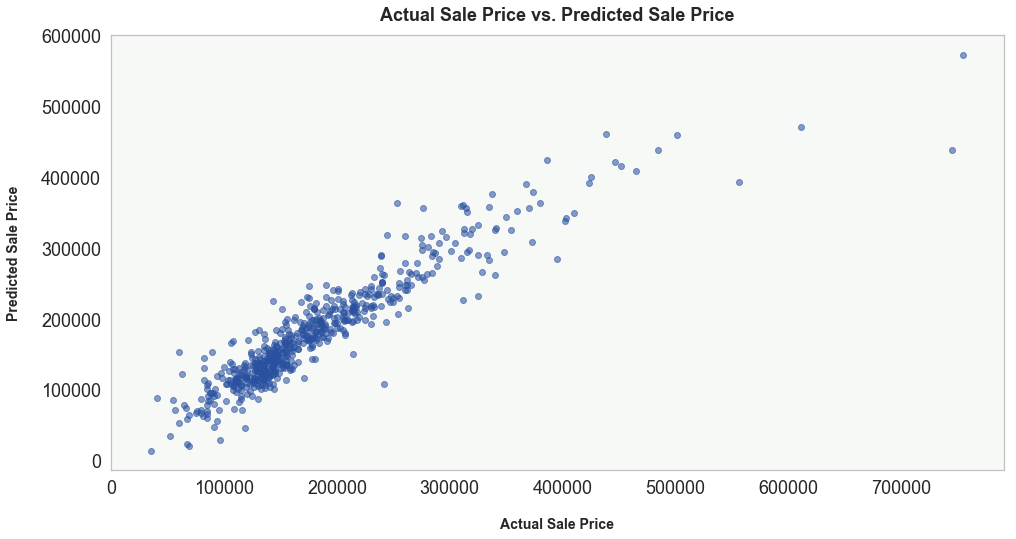

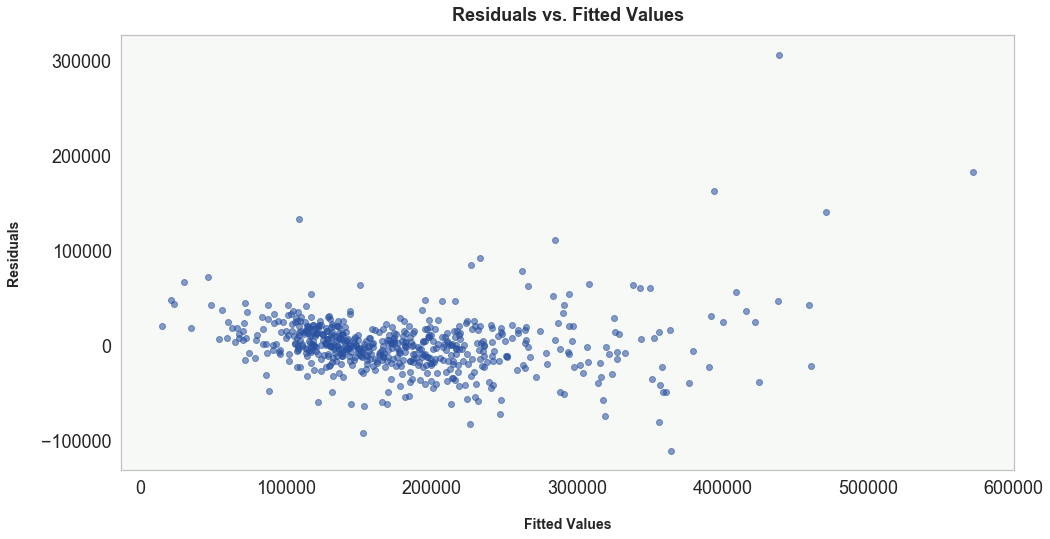

In [88]:
plot_fitted_vs_actual(result['y_test'], result['y_pred'])
plot_fitted_vs_resid(result['y_test'], result['y_pred'])

In [89]:
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, df.SalePrice, cv = 5)
print(np.mean(cv_scores))

0.7686004444589581


The model seems to do well with original data but does not generalize well on unseen data. 

## OLS Analysis

Lets use OLS package to create a regresion model for further evaluation

In [90]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [91]:
# X = X.drop('Id', axis=1)
X.columns = X.columns.str.replace(' ','')
X.columns = X.columns.str.replace('.','')
X.columns = X.columns.str.replace('2nd', 'Second')
X.columns = X.columns.str.replace('1st', 'First')
X.columns = X.columns.str.replace('3', 'Three')
X.columns = X.columns.str.replace('(', '')
X.columns = X.columns.str.replace(')', '')
X.columns = X.columns.str.replace('&', '')
df_ols = pd.concat([X, df.SalePrice], axis=1)

In [92]:
col_string = ""
for col in X.columns[:-1]:
    col_string += col + " + "

col_string += X.columns[-1]

In [93]:
ols_model = ols('SalePrice ~ '+ col_string , df_ols).fit()

In [94]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     63.46
Date:                Thu, 01 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:56:38   Log-Likelihood:                -16686.
No. Observations:                1460   AIC:                         3.383e+04
Df Residuals:                    1231   BIC:                         3.504e+04
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -3

## Regularized Regression (Lasso & Ridge)

Lets give Ridge/Lasso Regression a try:

In [95]:
from sklearn.linear_model import Ridge

def display_plot(cv_scores, cv_scores_std, alpha_space):
    fig, ax = plt.subplots(figsize=(16, 7))
    set_plot_style()
    ax.set_title('Alpha VS CV Score', fontsize=18)
    ax.set_xlabel('Alpha', fontsize=14)
    ax.set_ylabel('CV Score +/- Std Error', fontsize=14)
    ax.plot(alpha_space, cv_scores)
    std_error = cv_scores_std / np.sqrt(len(cv_scores))
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 40)

ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:
    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, df.SalePrice, cv=10)
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))


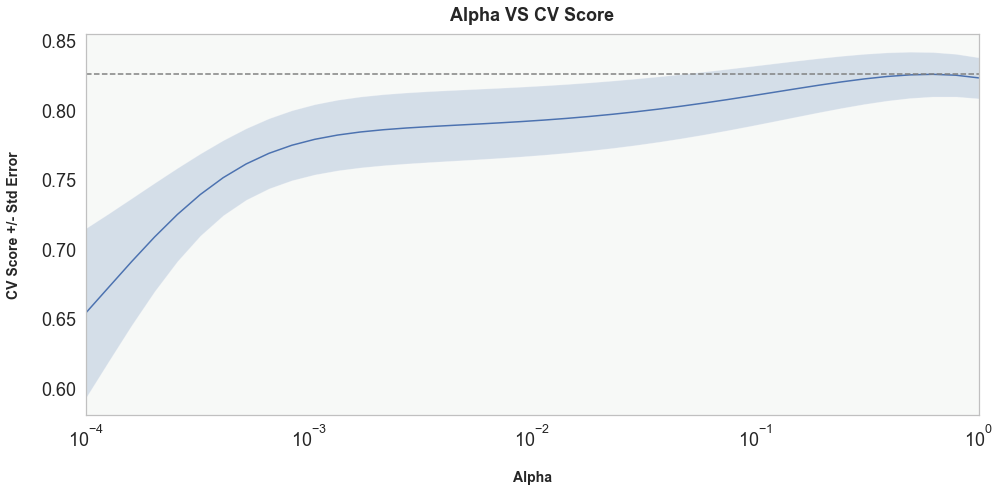

In [96]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std, alpha_space)

In [97]:
results_list_reg.append(np.max(cv_scores))

So looks like with a alpha of 1, we see the highest performance from the cross val scores. This maximum (dashed line) is: 87.454% explained variance

Lets try another form of regularized regression, Lasso regression. This method of regression can help in feature selection.

In [98]:
#Create a hyperparameter grid:
alpha_space = np.linspace(0, 1000, 50)
param_grid = {'alpha': alpha_space}

# Instantiate a lasso regressor: lasso
model = Lasso()

result_lasso_reg = fit_and_score(df.SalePrice, X, model, param_grid)

The R squared score: 0.8364417304511208
Optimized Hyperparameters: {'alpha': 326.53061224489795}
The Mean Squared Error or MSE: 1185407684.8110971


In [99]:
results_list_reg.append(result_lasso_reg['r_squared'])
print(np.sqrt(result_lasso_reg['mse']))

34429.74999634905


So on average, the lasso model has an error of 34,429$ per prediction. 

Lets take a look at the fitted vs observed values as well as the fitted vs residual plots:

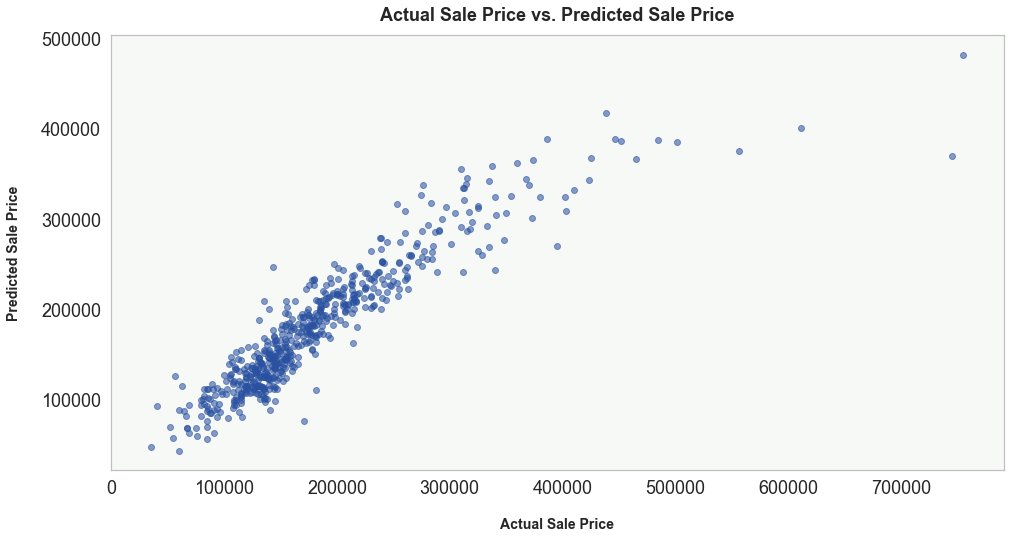

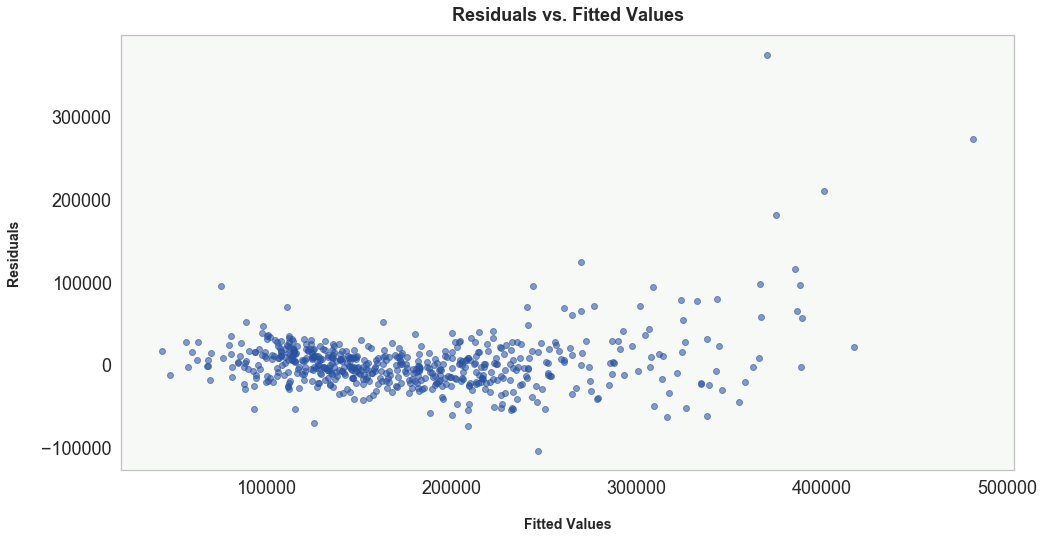

In [100]:
plot_fitted_vs_actual(result_lasso_reg['y_test'], result_lasso_reg['y_pred'])
plot_fitted_vs_resid(result_lasso_reg['y_test'], result_lasso_reg['y_pred'])

In [101]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score


X_train, X_test, y_train, y_test = train_test_split(X, df.SalePrice,
                                                    test_size = .3, 
                                                random_state= 42)
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=346)

# Fit the regressor to the data
lasso.fit(X_train, y_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_

#Score the model
lasso.score(X_test, y_test)

0.860653116587593

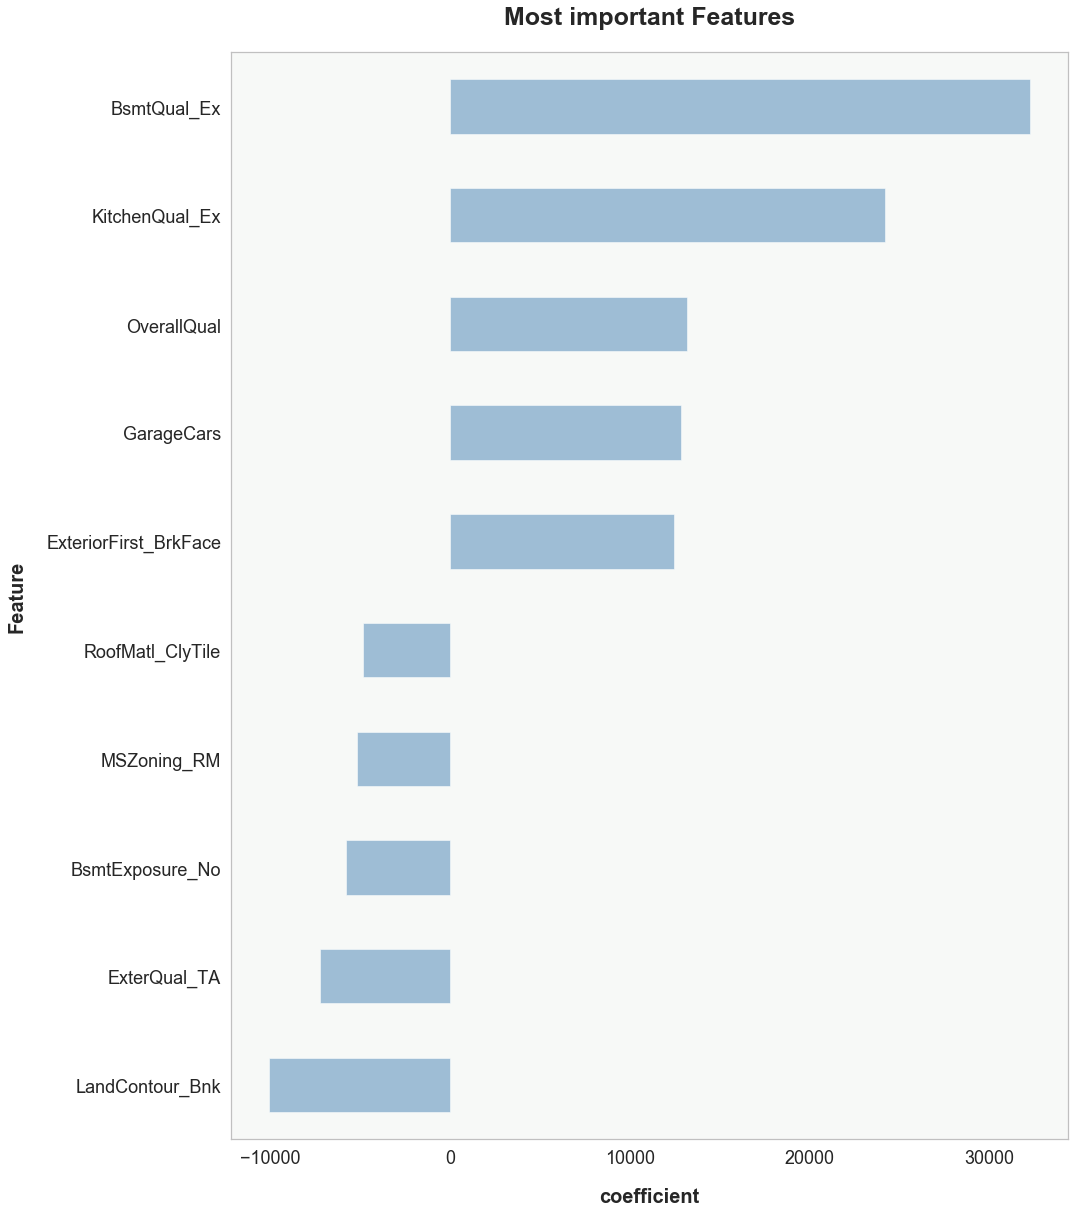

In [102]:
coef = pd.Series(lasso_coef, index=X.columns)
important_features = pd.concat([coef.sort_values().head(5), coef.sort_values().tail(5)])

plt.figure(figsize=(15,20))
plt.xlabel('coefficient', fontsize=20)
plt.ylabel('Feature', fontsize=20)
plt.title('Most important Features', fontsize=25)
_ = important_features.plot(kind='barh', alpha=.5, color='steelblue')

set_plot_style()

This is interesting, shows that many of the variables not investigated earlier have very high coefficients in the lasso regression model. These newly identified features could be worth exploring in the future.

## ElasticNet

Lets try Elastic Net Regression which uses a combination of L1 and L2 penalties (the penalties used in Lasso and Ridge regression respectively)

In [103]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV, train_test_split


# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df.SalePrice, test_size=.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 10)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
model = ElasticNet()

result_en_reg = fit_and_score(df.SalePrice, X, model, param_grid)

The R squared score: 0.8319874781484672
Optimized Hyperparameters: {'l1_ratio': 0.8888888888888888}
The Mean Squared Error or MSE: 1217690399.248078


In [104]:
results_list_reg.append(result_en_reg['r_squared'])
np.sqrt(result_en_reg['mse'])

34895.42089226147

So interpreting this MSE value, we can say that on average we are seeing an error roughly on the magnitude of 34,900 dollars. 

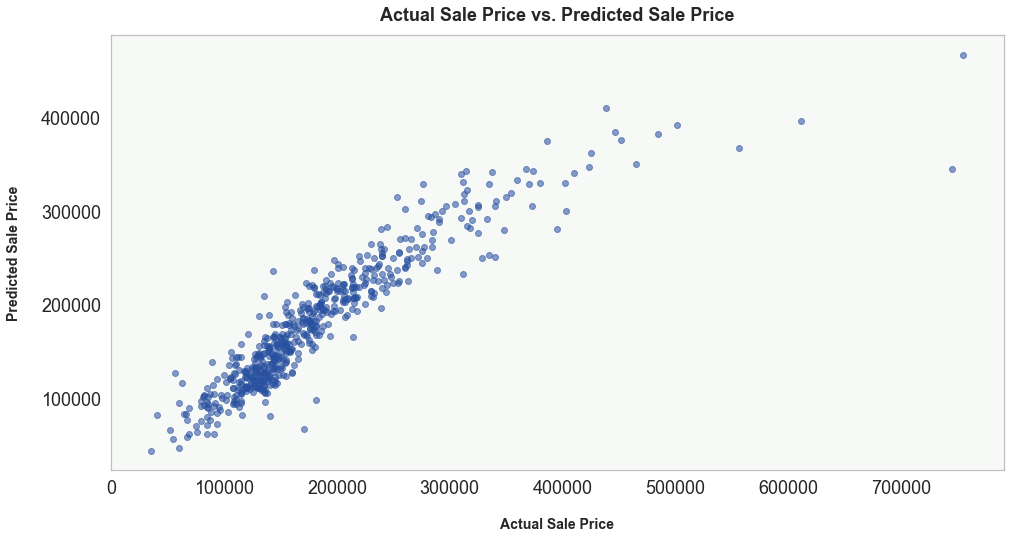

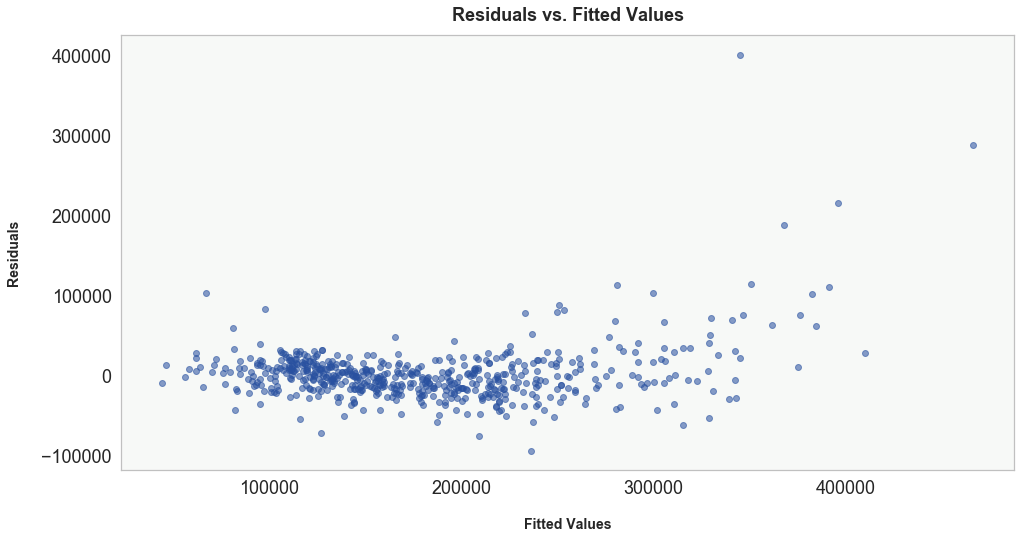

In [105]:
plot_fitted_vs_actual(result_en_reg['y_test'], result_en_reg['y_pred'])
plot_fitted_vs_resid(result_en_reg['y_test'], result_en_reg['y_pred'])

Lets try to perform regression with some other techniques such as KNN and Random Decision Trees

## Decision Trees:

In [106]:
from sklearn.tree import DecisionTreeRegressor

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df.SalePrice, test_size=.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.arange(1, 50, 2)
param_grid = {'max_depth': l1_space}

model = DecisionTreeRegressor()

result_dt_reg = fit_and_score(df.SalePrice, X, model, param_grid)

The R squared score: 0.659333559557385
Optimized Hyperparameters: {'max_depth': 7}
The Mean Squared Error or MSE: 2469019864.1239233


c:\users\daniel\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [107]:
results_list_reg.append(result_dt_reg['r_squared'])

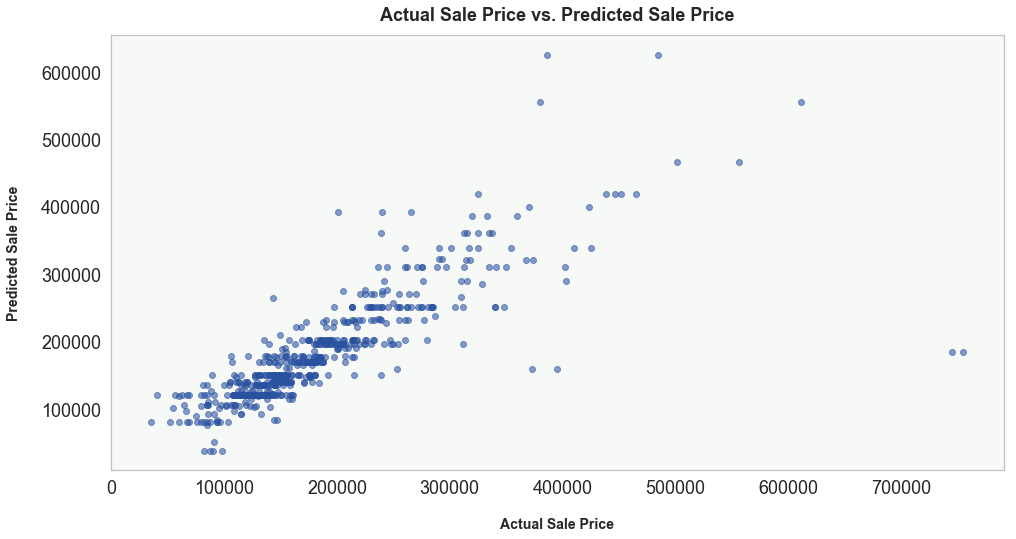

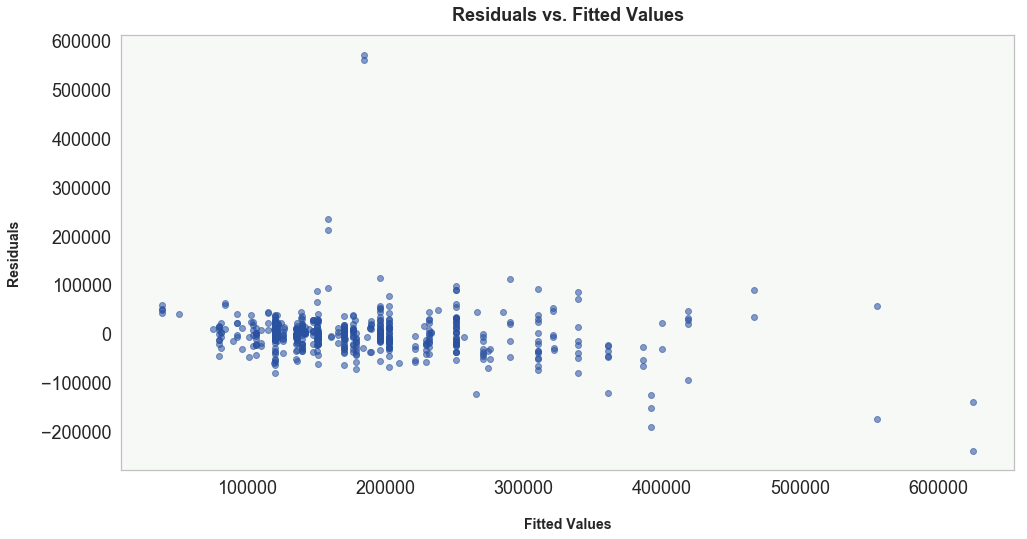

In [108]:
plot_fitted_vs_actual(result_dt_reg['y_test'], result_dt_reg['y_pred'])
plot_fitted_vs_resid(result_dt_reg['y_test'], result_dt_reg['y_pred'])

## KNN

In [109]:
from sklearn import neighbors
from sklearn.preprocessing import scale

# Create train and test sets (scale feature data using sklearn scale function)
X_train, X_test, y_train, y_test = train_test_split(scale(X), df.SalePrice, test_size=.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.arange(1, 20, 2)
param_grid = {'n_neighbors': l1_space}

model = neighbors.KNeighborsRegressor()

result_knn_reg = fit_and_score(df.SalePrice, X, model, param_grid)

The R squared score: 0.6771514963584786
Optimized Hyperparameters: {'n_neighbors': 9}
The Mean Squared Error or MSE: 2339882283.5555344


c:\users\daniel\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [110]:
results_list_reg.append(result_knn_reg['r_squared'])

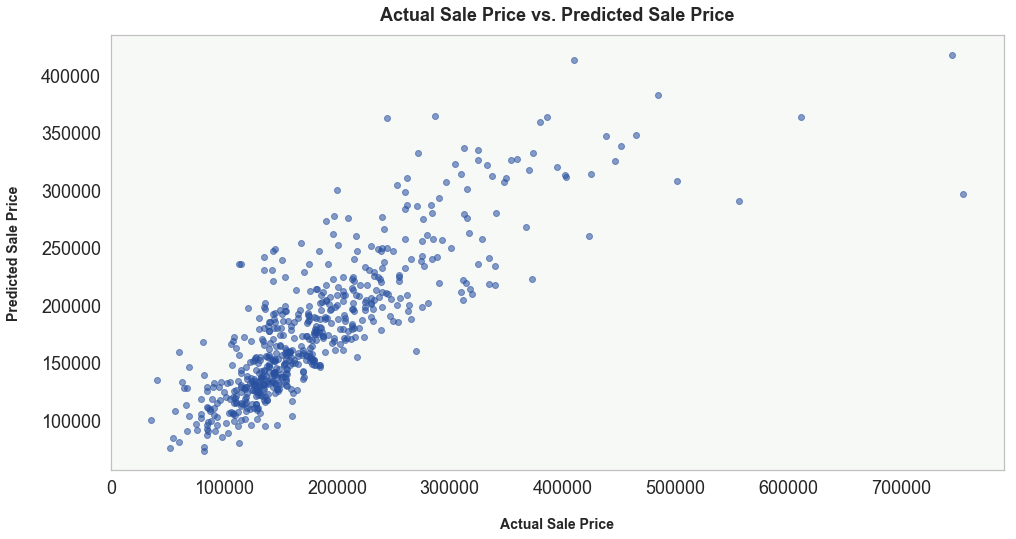

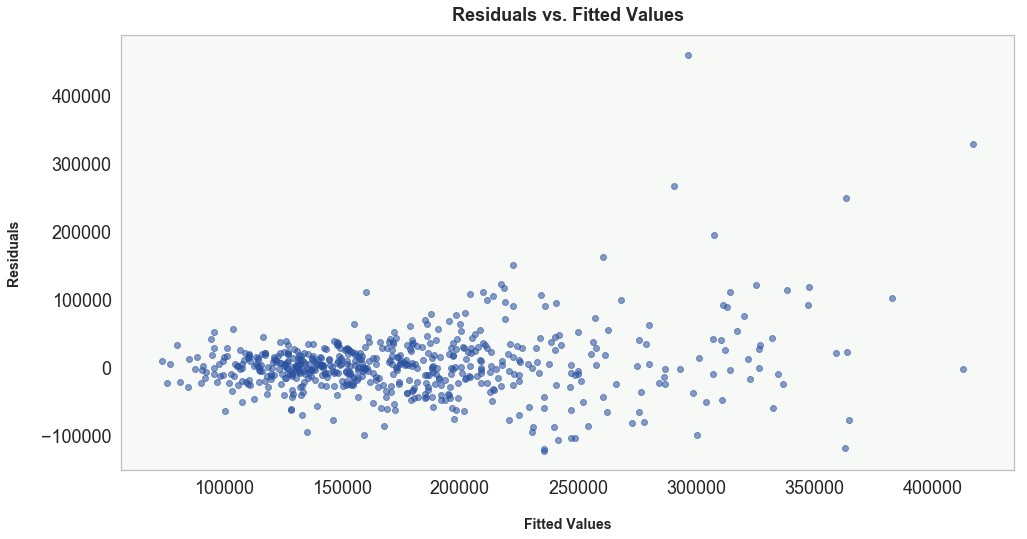

In [111]:
plot_fitted_vs_actual(result_knn_reg['y_test'], result_knn_reg['y_pred'])
plot_fitted_vs_resid(result_knn_reg['y_test'], result_knn_reg['y_pred'])

## Random Forests

In [112]:
from sklearn.ensemble import RandomForestRegressor

# Create the hyperparameter grid
max_depths = np.arange(1, 50, 5)
n_estimators = np.arange(1, 400, 50)
param_grid = {'max_depth': max_depths, 'n_estimators':n_estimators}

model = RandomForestRegressor()

result_rf_reg = fit_and_score(df.SalePrice, X, model, param_grid)

c:\users\daniel\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The R squared score: 0.8765776903366727
Optimized Hyperparameters: {'n_estimators': 101, 'max_depth': 41}
The Mean Squared Error or MSE: 894517622.1023784


In [113]:
results_list_reg.append(result_rf_reg['r_squared'])

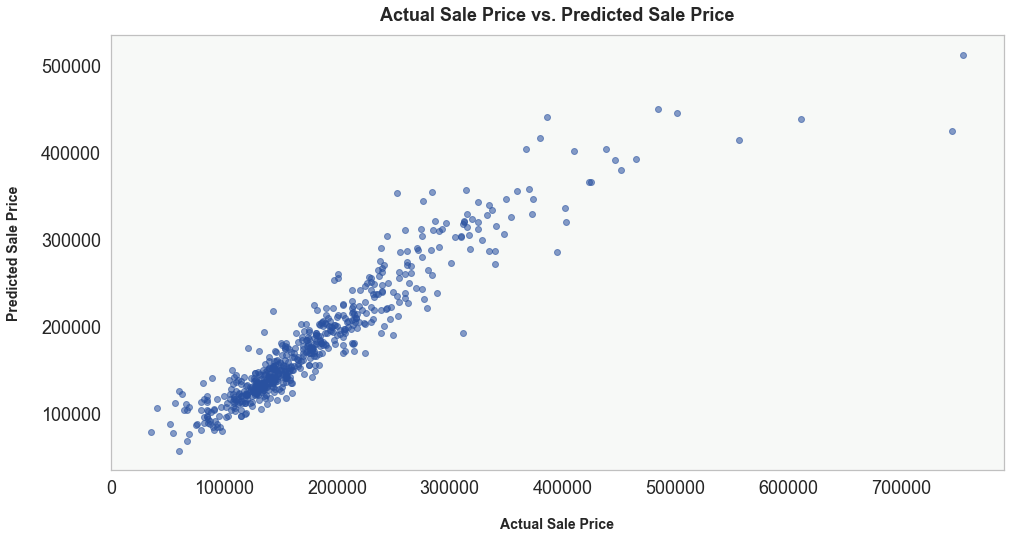

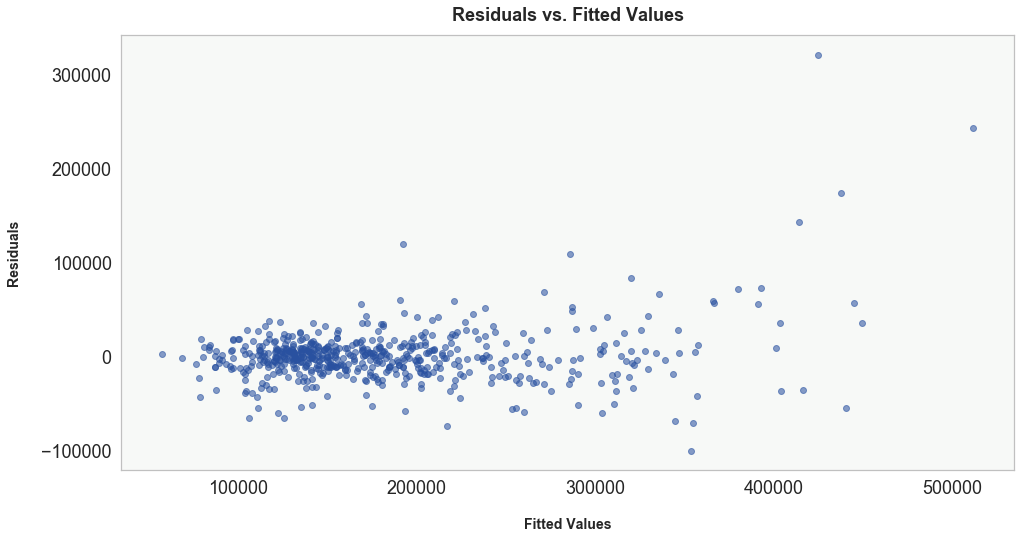

In [114]:
plot_fitted_vs_actual(result_rf_reg['y_test'], result_rf_reg['y_pred'])
plot_fitted_vs_resid(result_rf_reg['y_test'], result_rf_reg['y_pred'])

Since the highly priced homes seem to be causing a lot of error in the model, lets isolate the homes priced below 300,000 and see if we acheive better model performance. We can also do the same for the homes in the higher price range and see if perhaps a different model for this pricing tier would be more successful.

In [115]:
X['SalePrice'] = df.SalePrice

In [116]:
low_data = X[X['SalePrice']<250000]
high_data = X[X['SalePrice']>=250000]

In [117]:
low_prices = low_data.SalePrice
low_features = low_data.drop('SalePrice', axis=1)

high_prices = high_data.SalePrice
high_features = high_data.drop('SalePrice', axis=1)

In [118]:
from sklearn.ensemble import RandomForestRegressor

# Create the hyperparameter grid
max_depths = np.arange(1, 50, 5)
n_estimators = np.arange(1, 400, 50)
param_grid = {'max_depth': max_depths, 'n_estimators':n_estimators}

model = RandomForestRegressor()

result_rf_split = fit_and_score(low_prices, low_features, model, param_grid)

The R squared score: 0.8061001620494713
Optimized Hyperparameters: {'n_estimators': 101, 'max_depth': 41}
The Mean Squared Error or MSE: 362448096.46776885


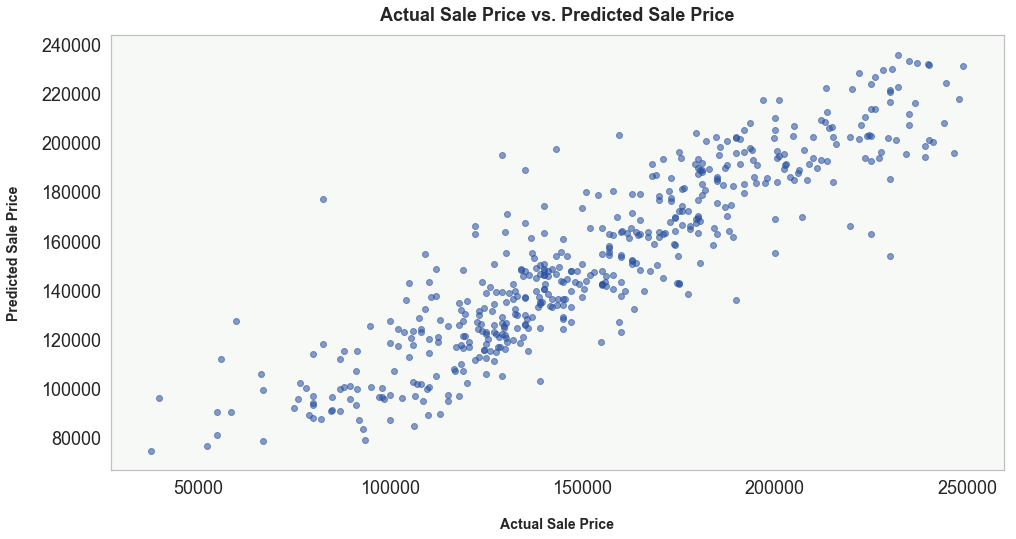

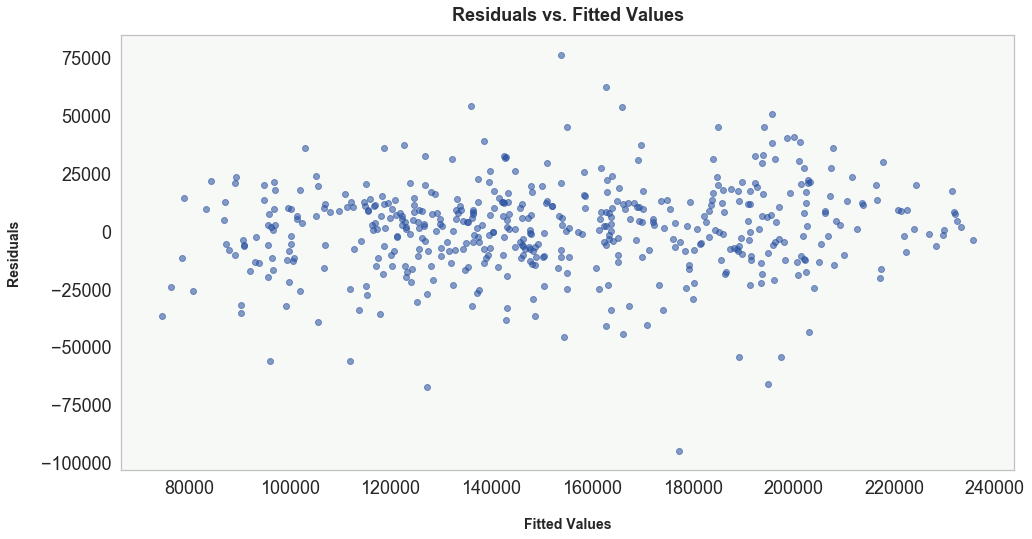

In [119]:
plot_fitted_vs_actual(result_rf_split['y_test'], result_rf_split['y_pred'])
plot_fitted_vs_resid(result_rf_split['y_test'], result_rf_split['y_pred'])

In [120]:
from sklearn.ensemble import RandomForestRegressor

#Create the hyperparameter grid
max_depths = np.arange(1, 50, 5)
n_estimators = np.arange(1, 400, 50)
param_grid = {'max_depth': max_depths, 'n_estimators':n_estimators}

model = RandomForestRegressor()

rf_reg_result = fit_and_score(high_prices, high_features, model, param_grid)

The R squared score: 0.5323878599759122
Optimized Hyperparameters: {'n_estimators': 101, 'max_depth': 41}
The Mean Squared Error or MSE: 4043725270.080287


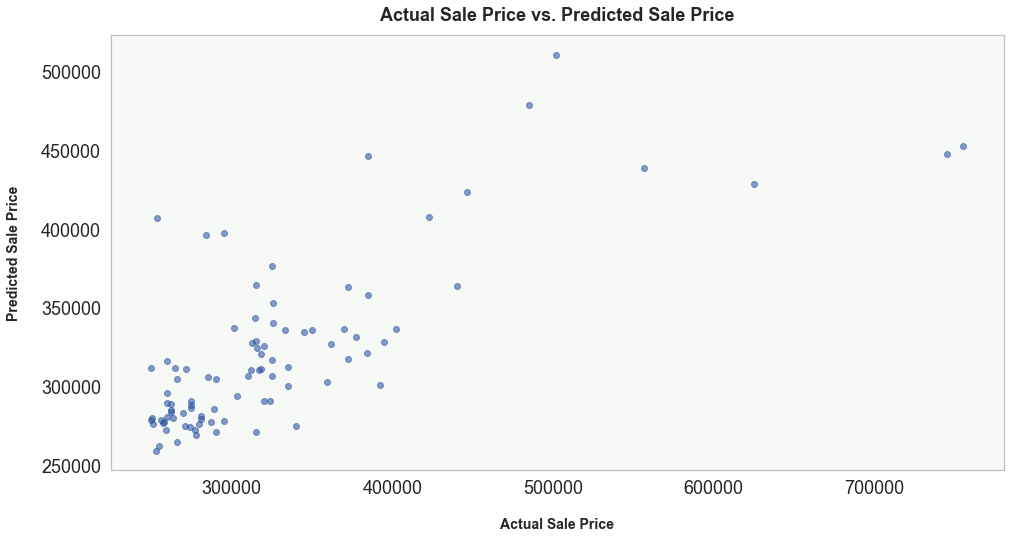

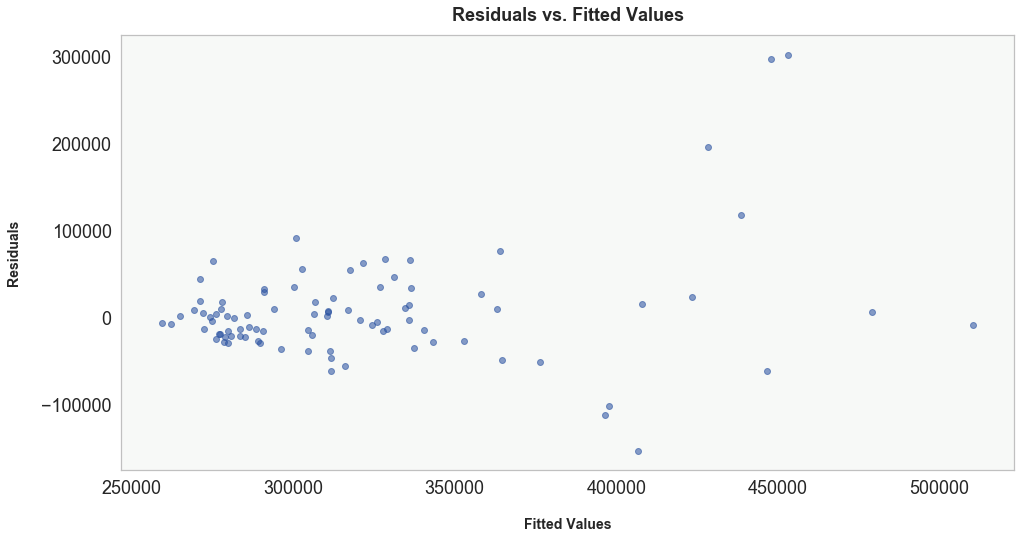

In [121]:
plot_fitted_vs_actual(rf_reg_result['y_test'], rf_reg_result['y_pred'])
plot_fitted_vs_resid(rf_reg_result['y_test'], rf_reg_result['y_pred'])

In [122]:
from scipy.stats import skew

numeric_features = df.select_dtypes(exclude=['object','category'])
skewed_features = numeric_features.apply(lambda x: skew(x))
skewed_features = skewed_features[abs(skewed_features) > .5].index

In [123]:
X = np.log1p(df[skewed_features])

In [124]:
categorical_features = list(df.select_dtypes(include=['object']).columns)

for feature in categorical_features:
    X = pd.concat([X, pd.get_dummies(df[feature], prefix=feature)], axis=1)

target = X.SalePrice
X = X.drop(columns=['SalePrice'])

## Ridge (Transformed)

In [125]:
from sklearn.linear_model import Ridge

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
param_grid = {'alpha':alphas}

model = Ridge()

result_ridge_tf = fit_and_score(target, X, model, param_grid, random=False)

The R squared score: 0.8945209212243107
Optimized Hyperparameters: {'alpha': 5}
The Mean Squared Error or MSE: 0.018117701837667637


In [126]:
results_list_reg.append(result_ridge_tf['r_squared'])

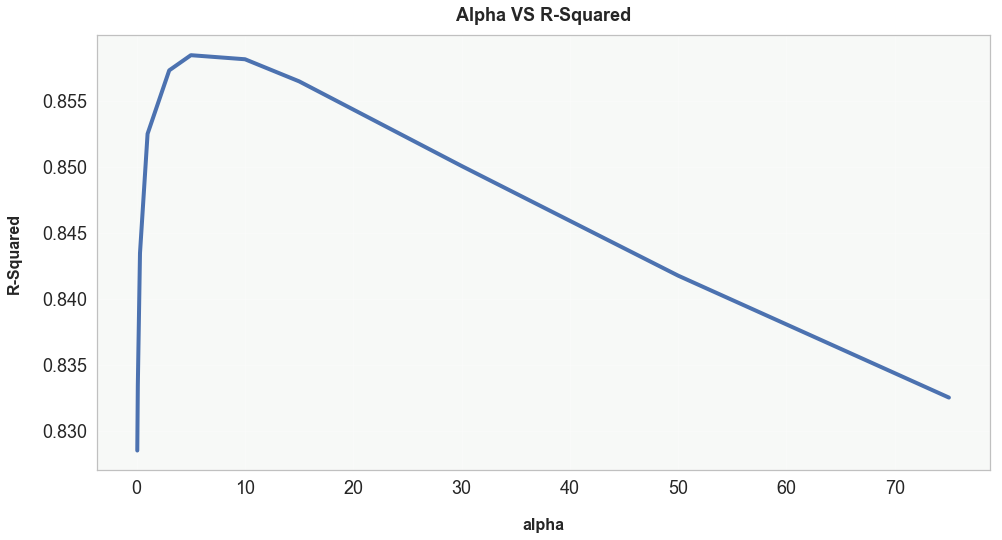

In [127]:
#take the mean r squared value for each alpha (from all 5 folds)
mean_r_squared = result_ridge_tf['model'].cv_results_['mean_test_score']

cv_df = pd.Series(mean_r_squared, index=alphas)
plt.figure(figsize=(16,8))
plt.xlabel('alpha', fontsize=16)
plt.ylabel('R-Squared', fontsize=16)
plt.title('Alpha VS R-Squared', fontsize=18)
set_plot_style()
_ = cv_df.plot(linewidth=4)

From this graph we can see its fairly clear that the optimal R-Squared value is obtained at an alpha of 5 (approximately).

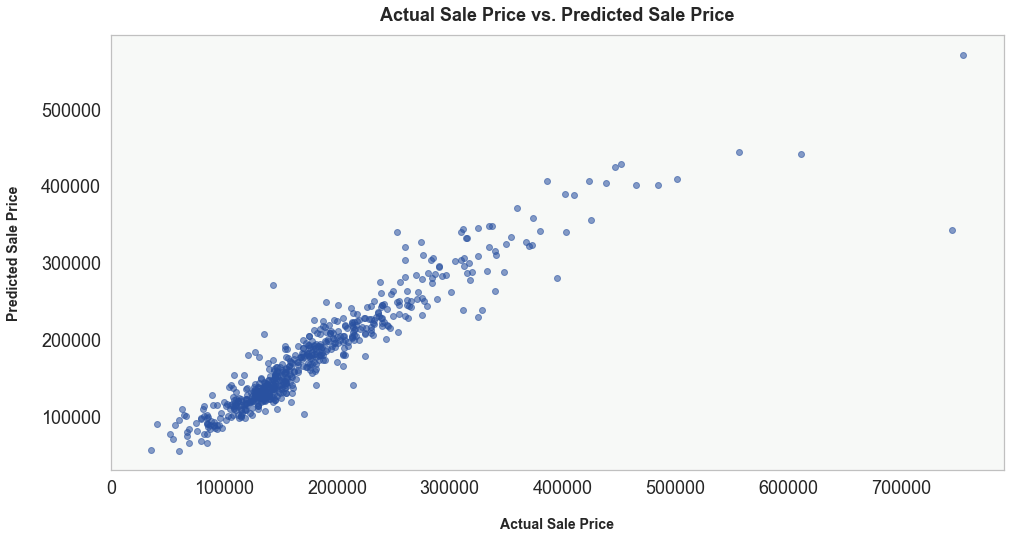

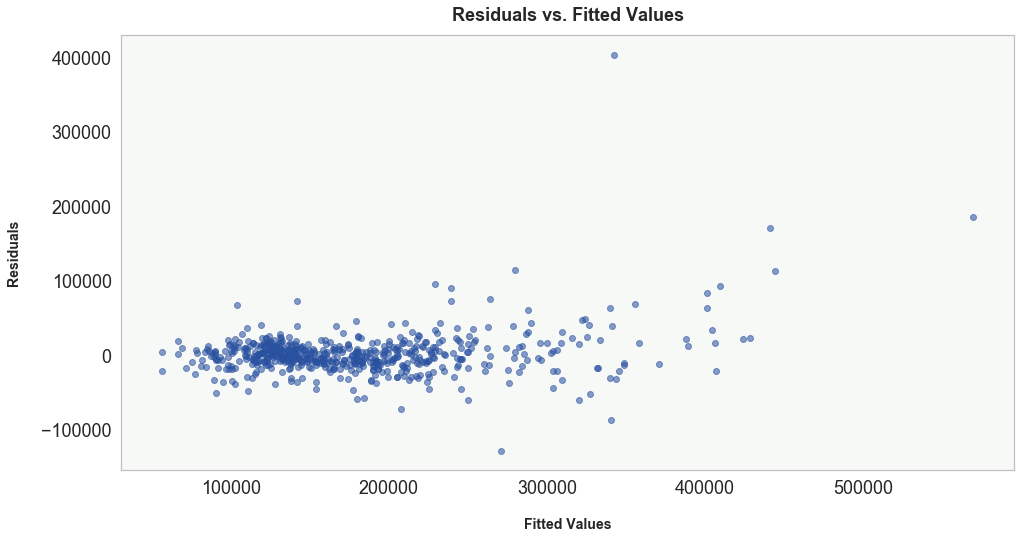

In [128]:
plot_fitted_vs_actual(np.expm1(result_ridge_tf['y_test']), np.expm1(result_ridge_tf['y_pred']))
plot_fitted_vs_resid(np.expm1(result_ridge_tf['y_test']), np.expm1(result_ridge_tf['y_pred']))

## Lasso (Transformed)

Lets use the log transformed data with the Lasso model as well

In [131]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=.4, random_state=42)

model_lasso_tf = Lasso()
alphas=[1, .5, .1, .05, .01, .001, .0005]

model_lasso_tf = LassoCV(alphas=alphas)
model_lasso_tf = model.fit(X_train, y_train)
model_lasso_tf.score(X_test, y_test)

0.9024234764968342

In [133]:
model_lasso_tf.alpha

1.0

In [134]:
coef = pd.Series(model_lasso_tf.coef_, index=X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 289 variables and eliminated the other 7 variables


In [135]:
gdt = gradient(np.array([106, 152, 242]))

NameError: name 'gradient' is not defined

In [ ]:
important_features = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

plt.rcParams['ytick.labelsize'] = 18
plt.figure(figsize=(15,20))
plt.xlabel('coefficient', fontsize=20)
plt.ylabel('Feature', fontsize=20)
plt.title('Most important Features', fontsize=25)
plot = important_features.plot(kind='barh', color='steelblue')
[patch.set_color(gdt.get_current_color()) for patch in plot.patches]
set_plot_style()

In [ ]:
results_list_reg.append(model_lasso_tf['r_squared'])

In [ ]:
plot_fitted_vs_actual(np.expm1(y_test), np.expm1(model_lasso_tf.predict(X_test)))
plot_fitted_vs_resid(np.expm1(y_test), np.expm1(model_lasso_tf.predict(X_test)))

## XGBoost (Transformed)

In [ ]:
import xgboost as xgb

In [ ]:
param_grid = {"max_depth":[5,10,20], "learning_rate":[.1,.2,.3], "colsample_bytree":[.2,.5,.9,1], "reg_alpha":[.2,.5,1]}
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 1000)
xgb_reg_result = fit_and_score(target, X, xgb_reg, param_grid)

In [ ]:
results_list_reg.append(xgb_reg_result['r_squared'])

In [ ]:
plot_fitted_vs_actual(np.expm1(xgb_reg_result['y_test']), np.expm1(xgb_reg_result['y_pred']))
plot_fitted_vs_resid(np.expm1(xgb_reg_result['y_test']), np.expm1(xgb_reg_result['y_pred']))

In [ ]:
xgb_model =xgb.XGBRegressor(reg_alpha=1, max_depth=15, learning_rate=0.1, colsample_bytree=0.9, objective ='reg:linear',
                        n_estimators = 1000)

xgb_model.fit(X_train, y_train)

In [ ]:
xgb.plot_tree(xgb_model, num_trees=25, rankdir='LR')
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
class gradient:
    def __init__(self, initial_color):
        self.color=initial_color
        self.current_color = initial_color/255
        
    def get_current_color(self):
        self.current_color = self.current_color*.95
        return(tuple(self.current_color))
        

gdt = gradient(np.array([44, 117, 234]))

In [ ]:
from mpltools import style
plt.rcParams['figure.figsize'] = [28, 28]
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.titlesize'] = 25

plot = xgb.plot_importance(xgb_model, max_num_features =12, alpha=.6)

for patch in plot.patches:
    patch.set_color(gdt.get_current_color())
    patch.set_height(.6)


[text.set_fontsize(25) for text in plot.texts]

set_plot_style()

plt.show()

In [ ]:
import sys
sys.executable
# plt.rcParams

**Classification**

It may be interesting just for practice to see if we can classify homes by neighborhood. In this case the target variable will be neighborhood and saleprice will be used like just any other feature.

In [ ]:
results_list_clf = []
target = df['Neighborhood']
X = df.select_dtypes(exclude=['object','category'])

categorical_features = list(df.select_dtypes(include=['object']).columns)
categorical_features.remove('Neighborhood')

for feature in categorical_features:
    X = pd.concat([X, pd.get_dummies(df[feature], prefix=feature)], axis=1)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = .2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_clf_score = knn.score(X_test, y_test)
results_list_clf.append(knn_clf_score)

print(knn_clf_score)

In [ ]:
param_grid={'n_neighbors':[2,4,6,8,10,15,20,25,50,75]}
knn_cv = GridSearchCV(knn, param_grid, cv=5)

best_model = knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)

In [ ]:
print("The Optimized Hyperparameters: n_neighbors: {}".format(best_model.best_estimator_.get_params()['n_neighbors']))
print("The Model Score: {}".format(knn_cv.score(X_test, y_test)))

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
param_grid={'C':[.1, 1, 10, 100, .001]}
lr_cv = GridSearchCV(LogisticRegression(), param_grid, cv=5)

best_model = lr_cv.fit(X_train, y_train)
lr_clf_score = lr_cv.score(X_test, y_test)
results_list_clf.append(lr_clf_score)

In [ ]:
print("The Optimized Hyperparameters: {}".format(best_model.best_estimator_.get_params()['C']))
print("The Model Score: {}".format(lr_clf_score))

In [ ]:
y_pred = best_model.predict(X_test)
comp_df = pd.DataFrame({'actual_neighborhood':y_test, 'predicted_neighborhood':y_pred})
diff_df = comp_df[comp_df['actual_neighborhood'] != comp_df['predicted_neighborhood']]
diff_df.shape[0]/comp_df.shape[0]

60% of the predictions are wrong for the Logistic Regression model

## Random Forest

Lets try Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid={'n_estimators':[1000, 2000, 3000], 'max_depth':[15,20,50,100]}
rf_cv = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

rf_cv.fit(X_train, y_train)

rf_clf_score = rf_cv.score(X_test, y_test)
results_list_clf.append(rf_clf_score)

In [ ]:
print("The Optimized Hyperparameters: {}".format(rf_cv.best_params_))
print("The Model Score: {}".format(rf_clf_score))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(n_estimators=1000)
xgb_clf.fit(X_train, y_train)
result = xgb_clf.score(X_test, y_test)
print("The Model Score: {}".format(result))

In [ ]:
reg_models_used = np.array(['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'KNN','Decision Trees', 'Random Forest', 
                            'Ridge (transformed data)','Lasso (transformed data)', 'XGBoost (transformed data)'])
reg_scores = np.array(results_list_reg)
cls_models_used = np.array(['KNN', 'Logistic_regression', 'Random_Forest', 'XGBoost'])
cls_scores = np.array(results_list_clf)

In [ ]:
regression_results = pd.DataFrame({'Model_Used': reg_models_used, 'R-Squared_Score': reg_scores})
classification_results = pd.DataFrame({'Model_Used': cls_models_used, 'Accuracy': cls_scores })

In [ ]:
plt.figure(figsize=(20,20))
set_plot_style()
plt.rcParams['ytick.labelsize'] = 25
plt.xlabel('R-Squared', fontsize=20)
plt.ylabel('Model', fontsize=20)
plt.title('Regression Results Summary', fontsize=25)
print(plt.title)
plot = sns.barplot(x='R-Squared_Score',y='Model_Used', data=regression_results.sort_values(by='R-Squared_Score'), palette=('Blues_d'))

for i in plot.patches:
    plot.text(i.get_width()+.02, i.get_y()+.38, str(i.get_width()), fontsize=18)

In [ ]:
from matplotlib import pyplot

plt.figure(figsize=(15,15))
plot = sns.barplot(x='Accuracy',y='Model_Used', data=classification_results.sort_values(by='Accuracy'), palette=("Blues_d"))
plt.xlabel('Accuracy', fontsize=22)
plt.ylabel('Model', fontsize=22)
plt.title('Classfication Results Summary', fontsize=25)
for i in plot.patches:
    plot.text(i.get_width()+.01, i.get_y()+.38, str(i.get_width()), fontsize=25)
set_plot_style()

In [ ]:
print(plt.rcParams)